<a href="https://colab.research.google.com/github/TheEliteAnalyst/ProgrammingAssignment2/blob/master/DS630CaliforniaHousing1218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
print("scikit-learn version:{}".format(sklearn.__version__))

scikit-learn version:0.20.1


In [0]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.pyplot as plt1
import numpy as np
from scipy import sparse
import sklearn
from sklearn import model_selection
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs, load_boston, fetch_california_housing
from sklearn.decomposition import PCA
#from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn import metrics
#from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.grid_search import GridSearchCV
from pprint import pprint
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import urllib
import requests
import zipfile
#import StringIO
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


In [3]:
CA_Housing=fetch_california_housing()

In [5]:
print ("Keys of California Housing Dataset: \n{}".format(CA_Housing.keys()))

Keys of California Housing Dataset: 
dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [6]:
print ("Target of California Housing Dataset: \n{}".format(CA_Housing.target))

Target of California Housing Dataset: 
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
print ("Feature Names of California Housing Dataset: \n{}".format(CA_Housing.feature_names))

Feature Names of California Housing Dataset: 
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Alternative shotcut Code:


*    print (CA_Housing.keys())
*   print (CA_Housing.feature_names)




In [8]:
print (CA_Housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [9]:
print("Type of data:{}".format(type(CA_Housing['data'])))

Type of data:<class 'numpy.ndarray'>


In [10]:
print("Shape of data:{}".format(CA_Housing['data'].shape))

Shape of data:(20640, 8)


Total Number of Observations is 20,640 with 8 Features/ Parameters

In [11]:
print("1st 5 Observations of data:{}".format(CA_Housing['data'][:5]))

1st 5 Observations of data:[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [12]:
print("Type of Target:{}".format(type(CA_Housing['target'])))

Type of Target:<class 'numpy.ndarray'>


In [13]:
print("Shape of Target:{}".format(CA_Housing['target'].shape))

Shape of Target:(20640,)


Results above confirms Target is one dimenional array with one entry for each observation

In [14]:
print("Target:{}".format(CA_Housing['target']))

Target:[4.526 3.585 3.521 ... 0.923 0.847 0.894]


**Full Data Set - Features & Target**

In [0]:
# Original Data
CA_Housing_Full_df = pd.DataFrame(data= np.c_[CA_Housing['data'], CA_Housing['target']],
                     columns= CA_Housing['feature_names'] + ['Median House Value'])
# Features & Target
X_full, y_full = CA_Housing.data, CA_Housing.target

**High Level Process:**

*   Visualizing Data to better understand each feature's characeristics - e.g. Distribution, Outliers,Relationship to target ( median house value )
*   Exclude outliers based on IQR *(To be fine tuned by excluding extreme outliers only)*
*   Split Data into Training & Targer data sets
*  Apply Transformation to both Training and Test sets using scaler function - Types to follow.
*  For efficient computation the following syntax is use: scaler = StandardScaler(); X_scaled_d = scaler.fit_transform(X_train);
* Create Models using original Dataset, dataset excluding outliers, transforemed data.
* Models include:
    - Linear Regressions, Ridge, Lasso and ElasticNet.
    - Different Alpha Values
    - Evaluate Scores and mse

* Cross Validation
* Apply GridSearcgCV which will use cross validation instead of split into training and validation. Note, data split into tain and test still required to ensure no overfitting (P.268)




**Visualizing Data**
1. Create a dataframe from the data
2. Add column names from features


To resolve issue with installing mglearn
https://github.com/amueller/introduction_to_ml_with_python/issues/3

In [17]:
! pip install mglearn

    100% |████████████████████████████████| 542kB 20.0MB/s 
  Running setup.py bdist_wheel for mglearn ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import mglearn
import matplotlib.pyplot as plt

**Original Data Including Outliers**

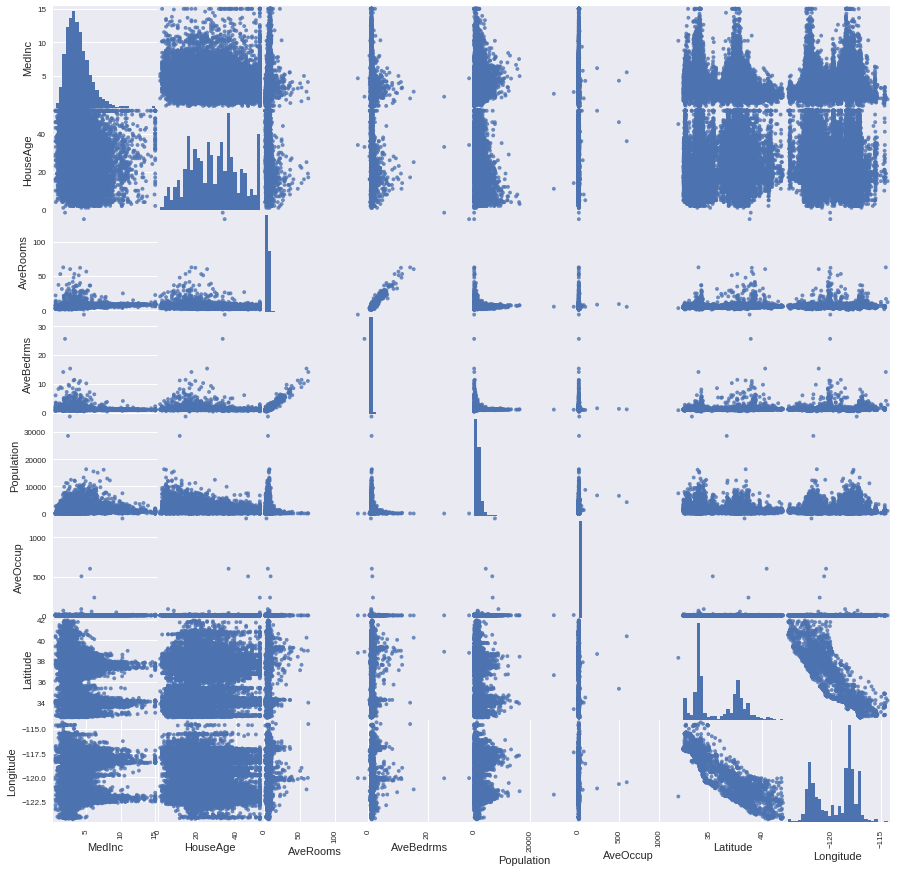

In [19]:
CA_Housing_df = pd.DataFrame(CA_Housing['data'], columns=CA_Housing.feature_names)
pd.plotting.scatter_matrix(CA_Housing_df, figsize=(15,15), hist_kwds={'bins':30}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

In [20]:
print(CA_Housing_df.shape)
print(CA_Housing_df.ndim)
print(CA_Housing_df.dtypes)
print(CA_Housing_df.head())
print(CA_Housing_df.tail())

(20640, 8)
2
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7

**Describe helps summarize the data in terms key statistics - e.g. Mean, Min/ Max. ..etc**

In [21]:
print(CA_Housing_df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

Sources & Links : https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

**Identifying  number of unique values by Feature**
Results below indicates Average Rooms and Bedroms unique numbers are high and there is potential  of more concise dataset if wew round up values and use as factor instead of float

In [22]:
CA_Housing_df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
dtype: int64

In case any of the Variables Features needed to be casted as diff. Type, we use the following fn. Example, if we decided to use number of bedrooms as factor instead of Av. Number which is float

data['NoOfBedrooms'].astype(str)

**Visualization **-  Boxplot for each  feature except "Population" &  "AveOccup" as they had significant outliers

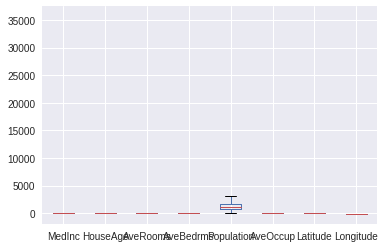

In [23]:
CA_Housing_df.boxplot()

**Visualization **- Boxplot for each feature except "Population" & "AveOccup" as they had significant outliers

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


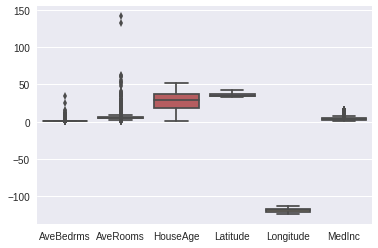

In [24]:
sns.boxplot(data=CA_Housing_df[CA_Housing_df.columns.difference(['Population', 'AveOccup'])])
sns.plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


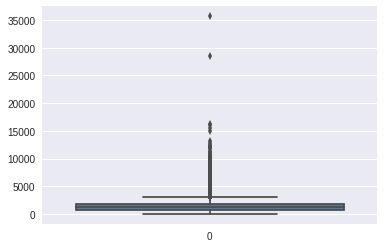

In [25]:
sns.boxplot(data=CA_Housing_df['Population'])
sns.plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


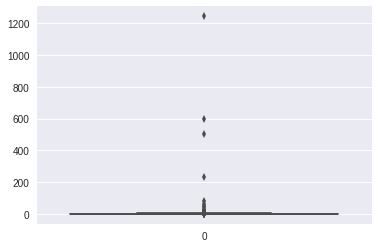

In [26]:
sns.boxplot(data=CA_Housing_df['AveOccup'])
sns.plt.show()

https://stackoverflow.com/questions/41325160/seaborn-plots-in-a-loop

**Identifying Outliers per Attribute using  interquartile range (IQR)**
IQR = Q3 − Q1

In [27]:
Q1 = CA_Housing_df.quantile(0.25)
Q3 = CA_Housing_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MedInc          2.179850
HouseAge       19.000000
AveRooms        1.611665
AveBedrms       0.093447
Population    938.000000
AveOccup        0.852520
Latitude        3.780000
Longitude       3.790000
dtype: float64


**Create a Boolean to identify records that meets the criteria of outliers based on  IQR results**

In [28]:
print(CA_Housing_Full_df < (Q1 - 1.5 * IQR)) |(CA_Housing_Full_df > (Q3 + 1.5 * IQR))

       AveBedrms  AveOccup  AveRooms  HouseAge  Latitude  Longitude  MedInc  \
0          False     False     False     False     False      False   False   
1          False     False     False     False     False      False   False   
2          False     False     False     False     False      False   False   
3          False     False     False     False     False      False   False   
4          False     False     False     False     False      False   False   
5          False     False     False     False     False      False   False   
6          False     False     False     False     False      False   False   
7          False     False     False     False     False      False   False   
8          False     False     False     False     False      False   False   
9          False     False     False     False     False      False   False   
10         False     False     False     False     False      False   False   
11         False     False     False     False     F

TypeError: ignored

**Removing Records that Fits criteria of an outlier for any of features**
Tota Records = 20,640
After removing outliers based on IQR, remaining records  = 16,842
~ 20% of observations

In [29]:
CA_Housing_df_out = CA_Housing_Full_df[~((CA_Housing_Full_df < (Q1 - 1.5 * IQR)) |(CA_Housing_Full_df > (Q3 + 1.5 * IQR))).any(axis=1)]
CA_Housing_df_out.shape


(16842, 9)

**Plotting Features after excluding Outliers for all features**

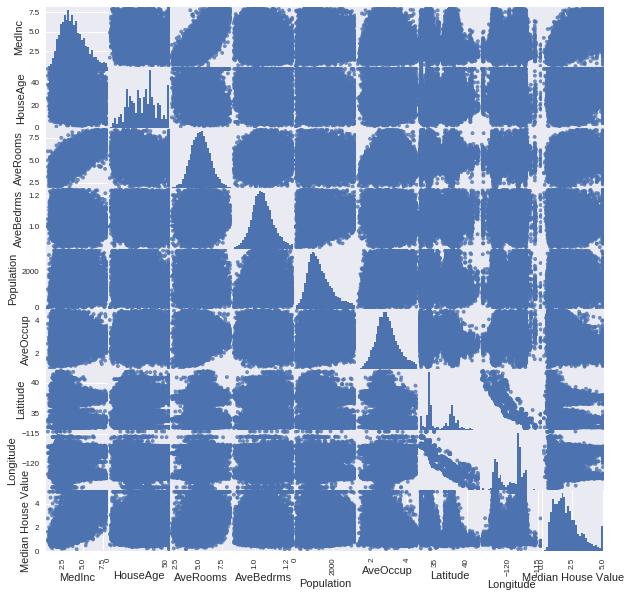

In [30]:
pd.plotting.scatter_matrix(CA_Housing_df_out, figsize=(10,10), hist_kwds={'bins':30}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

**Revised Outlier selection by limiting to only excluding outliers in Population & Average Occupancy Features**
    Decision made that this dataset will be used as it excludes reasonable number of observations instead of using   blunt force to exclude all outliers based on IQR

In [31]:
CA_Housing_df_out_rev = CA_Housing_Full_df[~((CA_Housing_Full_df[CA_Housing_Full_df.columns.difference(['Population', 'AveOccup'])] < (Q1 - 1.5 * IQR)) |(CA_Housing_Full_df[CA_Housing_Full_df.columns.difference(['Population', 'AveOccup'])] > (Q3 + 1.5 * IQR))).any(axis=1)]
CA_Housing_df_out_rev.shape

(18501, 9)

**Plotting Matrix After Excluding Outliers for both Population & Average Occupancy Features**

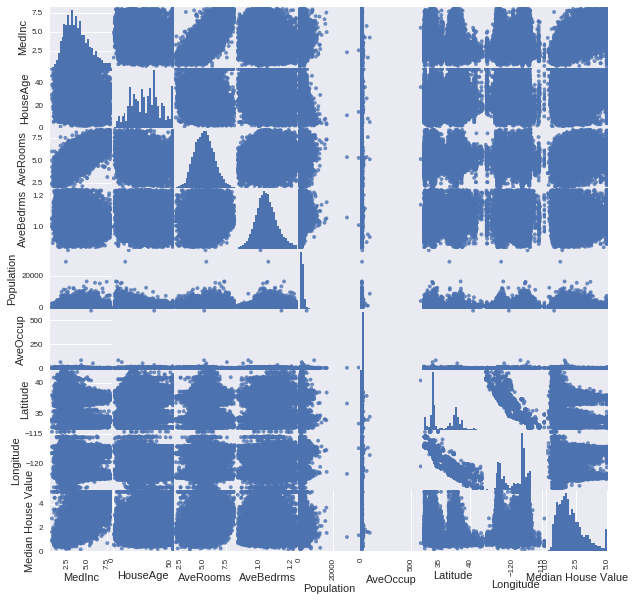

In [32]:
pd.plotting.scatter_matrix(CA_Housing_df_out_rev, figsize=(10,10), hist_kwds={'bins':30}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()



In [32]:
# Example of Excluding a column
CA_Housing_df_rev = CA_Housing_df[CA_Housing_df.columns.difference(['Population', 'AveOccup'])]
CA_Housing_df_rev.describe()

AveBedrms      AveRooms      HouseAge      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       1.096675      5.429000     28.639486     35.631861   -119.569704   
std        0.473911      2.474173     12.585558      2.135952      2.003532   
min        0.333333      0.846154      1.000000     32.540000   -124.350000   
25%        1.006079      4.440716     18.000000     33.930000   -121.800000   
50%        1.048780      5.229129     29.000000     34.260000   -118.490000   
75%        1.099526      6.052381     37.000000     37.710000   -118.010000   
max       34.066667    141.909091     52.000000     41.950000   -114.310000   

             MedInc  
count  20640.000000  
mean       3.870671  
std        1.899822  
min        0.499900  
25%        2.563400  
50%        3.534800  
75%        4.743250  
max       15.000100

Using  Mahalanobis to identify and remove outliers in more holistic view instead of IQR
*## Need to Revisit Approach for completness as code corresponding to R not working ##*
* https://stackoverflow.com/questions/29817090/is-there-a-python-equivalent-to-the-mahalanobis-function-in-r-if-not-how-can
* https://stackoverflow.com/questions/46827580/multivariate-outlier-removal-with-mahalanobis-distance

In [0]:
# from scipy.spatial.distance import mahalanobis
# import scipy as sp
# import pandas as pd

# Sx = CA_Housing_df.cov().values
# Sx = sp.linalg.inv(Sx)

# mean = CA_Housing_df.mean().values

# def mahalanobisR(X,meanCol,IC):
#    m = []
#    for i in range(X.shape[0]):
#        m.append(mahalanobis(X[i,:],meanCol,IC) ** 2)
#    return(m)

# mR = mahalanobisR(x,mean,Sx)

**Create a split with Original Dataset**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CA_Housing['data'], CA_Housing['target'], random_state=0)

In [83]:
print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

X_train shape:(15480, 8)
y_train shape:(15480,)
X_test shape:(5160, 8)
y_test shape:(5160,)


**Create a plit with the Dataset excluding Outliers**

In [0]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(CA_Housing_df_out_rev[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']], CA_Housing_df_out_rev['Median House Value'], random_state=0)

In [85]:
print("X1_train shape:{}".format(X1_train.shape))
print("y1_train shape:{}".format(y1_train.shape))
print("X1_test shape:{}".format(X1_test.shape))
print("y1_test shape:{}".format(y1_test.shape))

X1_train shape:(13875, 8)
y1_train shape:(13875,)
X1_test shape:(4626, 8)
y1_test shape:(4626,)


 **Visualizing the Features in the Training Set**
 

*   Create Dataframe with training set
*   Add column names from dataset features_names



**Before Excluding Outliers**

In [0]:
trainSet_df = pd.DataFrame(X_train, columns=CA_Housing.feature_names)


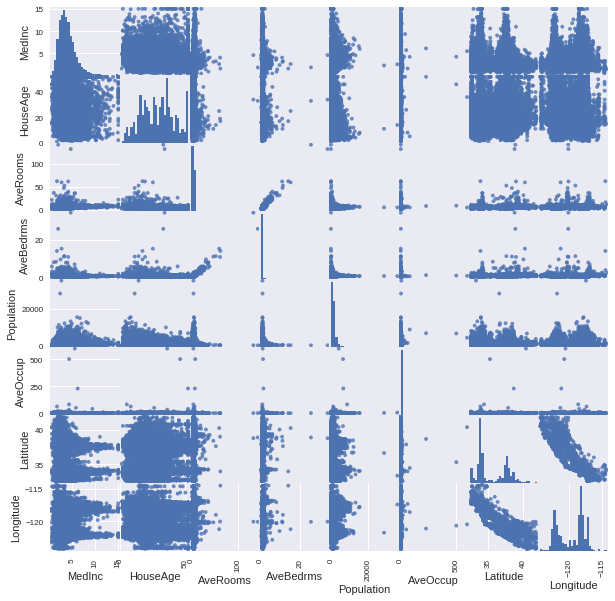

In [87]:
pd.plotting.scatter_matrix(trainSet_df, figsize=(10,10), hist_kwds={'bins':30}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

**After Excluding Outliers**

**Comparison between Before and After shows improvment is univariate ditsribution **- e.g.Median Income is Right Skewed but after removing outliers, it is is  moderatly right skewed.


In [0]:
trainSet1_df = pd.DataFrame(X1_train)

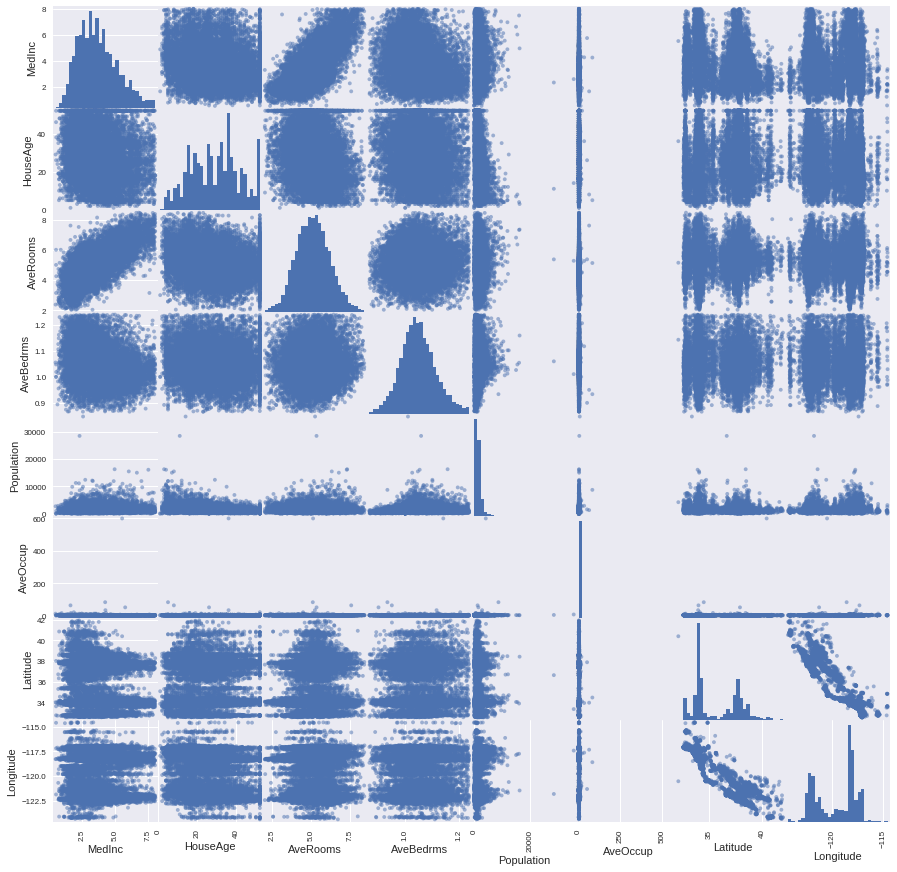

In [89]:
pd.plotting.scatter_matrix(trainSet1_df, figsize=(15,15), hist_kwds={'bins':30}, s=60, alpha=.5, cmap=mglearn.cm3)
plt.show()

*Scaling Data**

*Model Technique can be used for continuous variable as well as discrete*
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py



In [90]:
CA_Housing_Full_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Median House Value  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422

https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd


**Univariate Visualization** - Original Dataset

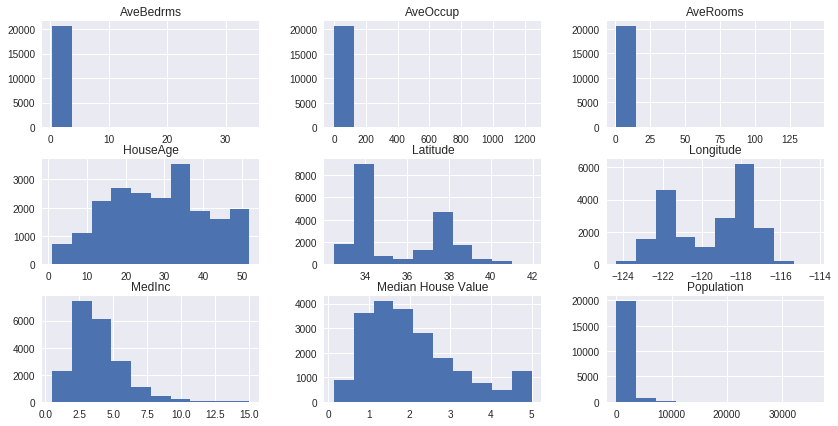

In [91]:
features = ['MedInc', 'HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','Median House Value']
CA_Housing_Full_df[features].hist(figsize=(14, 7));

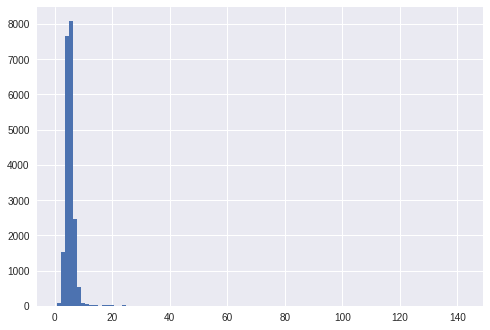

In [92]:
# CA_Housing_Full_df['AveRooms'].hist(figsize=(14, 7))
plt.hist(CA_Housing_Full_df['AveRooms'], bins=100)
plt.show()

https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/

**Univariate Visualization after Excluding Outliers**

Note that there was no significant enhancement to Average Occupancy & Population even  after including as a parameter  where outliers are excluded based on IQR results.

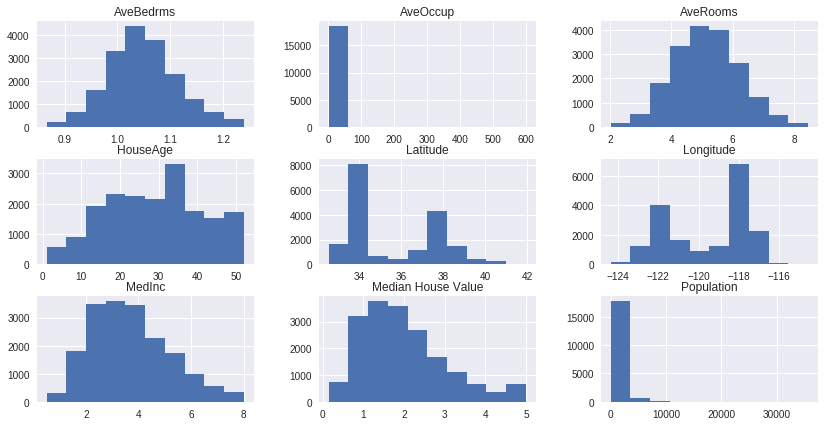

In [93]:
features = ['MedInc', 'HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude', 'Median House Value']
CA_Housing_df_out_rev[features].hist(figsize=(14, 7));

***Before & after Excluding Outliers***

**The following Visualization for Med Income before  & after excluding the outliers for only 2 features indicates positive effect on data as it converges to a normal distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

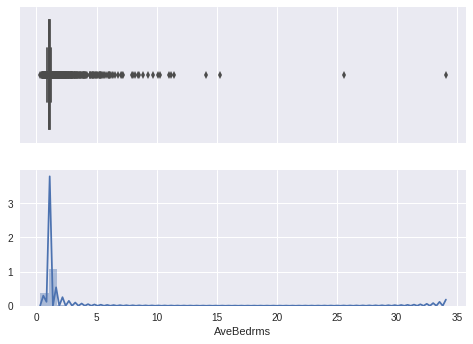

In [94]:
# Import library and dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_Full_df['AveBedrms'], ax=ax_box)
sns.distplot(CA_Housing_Full_df['AveBedrms'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

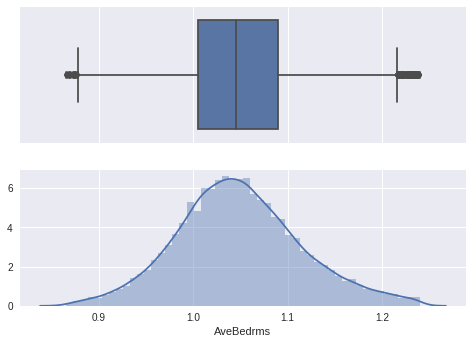

In [95]:

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_df_out_rev['AveBedrms'], ax=ax_box)
sns.distplot(CA_Housing_df_out_rev['AveBedrms'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

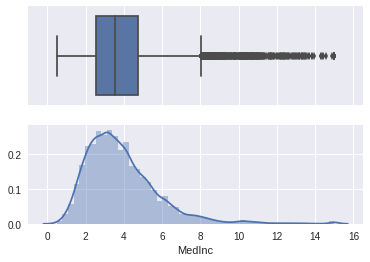

In [45]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_Full_df['MedInc'], ax=ax_box)
sns.distplot(CA_Housing_Full_df['MedInc'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

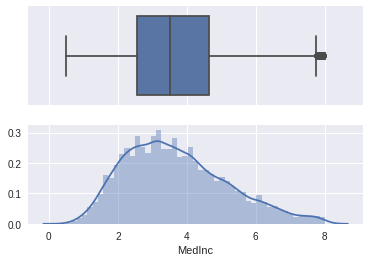

In [46]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_df_out_rev['MedInc'], ax=ax_box)
sns.distplot(CA_Housing_df_out_rev['MedInc'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

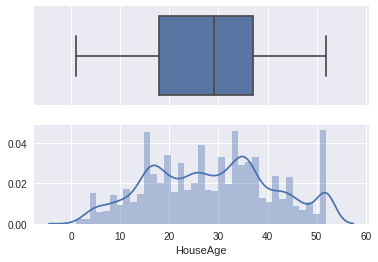

In [47]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_Full_df['HouseAge'], ax=ax_box)
sns.distplot(CA_Housing_Full_df['HouseAge'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

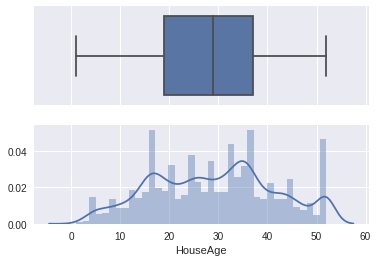

In [48]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_df_out_rev['HouseAge'], ax=ax_box)
sns.distplot(CA_Housing_df_out_rev['HouseAge'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

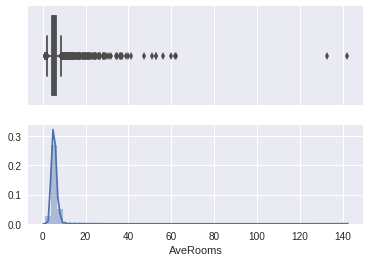

In [49]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_Full_df['AveRooms'], ax=ax_box)
sns.distplot(CA_Housing_Full_df['AveRooms'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

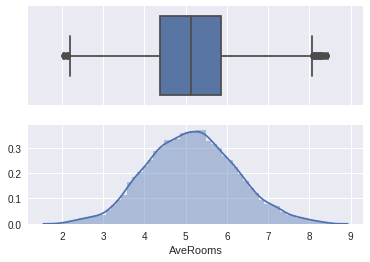

In [50]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_df_out_rev['AveRooms'], ax=ax_box)
sns.distplot(CA_Housing_df_out_rev['AveRooms'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

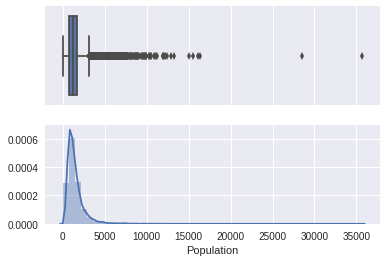

In [51]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_Full_df['Population'], ax=ax_box)
sns.distplot(CA_Housing_Full_df['Population'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

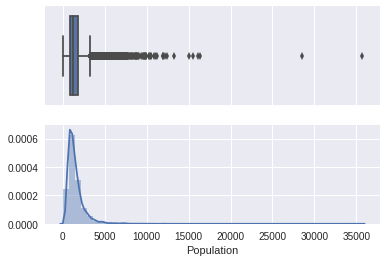

In [52]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_df_out_rev['Population'], ax=ax_box)
sns.distplot(CA_Housing_df_out_rev['Population'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

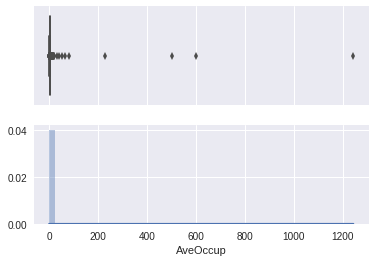

In [53]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_Full_df['AveOccup'], ax=ax_box)
sns.distplot(CA_Housing_Full_df['AveOccup'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0.5,0,'')]

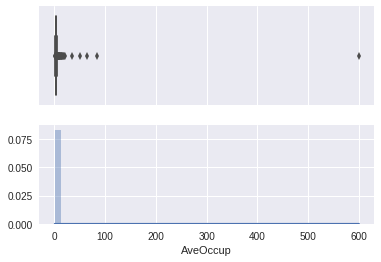

In [54]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, sharex=True)
 
# Add a graph in each part
sns.boxplot(CA_Housing_df_out_rev['AveOccup'], ax=ax_box)
sns.distplot(CA_Housing_df_out_rev['AveOccup'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Visualization** - Relationship between Features and Target
*Before & After excluding Outliers*

https://seaborn.pydata.org/generated/seaborn.regplot.html
https://seaborn.pydata.org/tutorial/axis_grids.html

Visualization of all features shows how range significantly varies

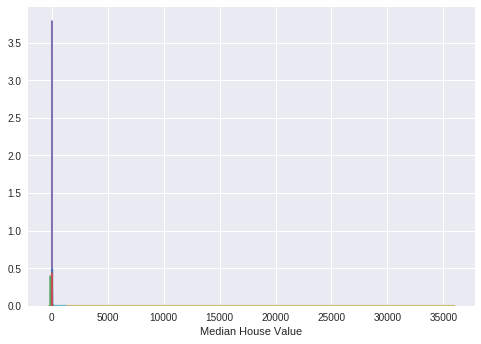

In [96]:
sns.distplot(CA_Housing_Full_df['AveRooms'])
sns.distplot(CA_Housing_Full_df['MedInc'])
sns.distplot(CA_Housing_Full_df['HouseAge'])
sns.distplot(CA_Housing_Full_df['AveBedrms'])
sns.distplot(CA_Housing_Full_df['Population'])
sns.distplot(CA_Housing_Full_df['AveOccup'])
sns.distplot(CA_Housing_Full_df['Latitude'])
sns.distplot(CA_Housing_Full_df['Longitude'])
sns.distplot(CA_Housing_Full_df['Median House Value'])



**Visualization** - Relationship between each Feature and the Target
*Purpose of the Visualization is to identify Trend, Correlations, ..etc as well as impact of excluding outliers and if yielded better distribution for features*

**Average Rooms:** Significant enhancement is distribution after excluding Outliers------> It converges to Normal Distribution

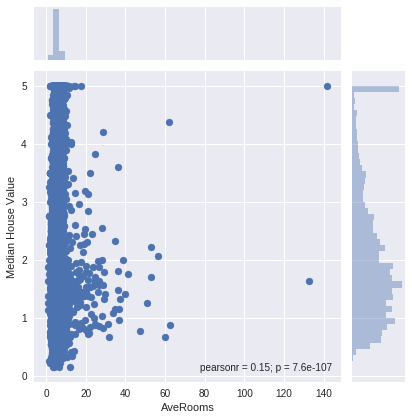

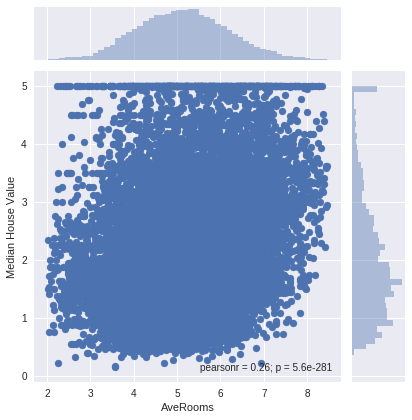

In [97]:
# Add a graph in each part
sns.jointplot(x="AveRooms", y="Median House Value", data=CA_Housing_Full_df)
sns.jointplot(x="AveRooms", y="Median House Value", data=CA_Housing_df_out_rev)

**Median Income **: Distribution enhanced and became slightly right skewed

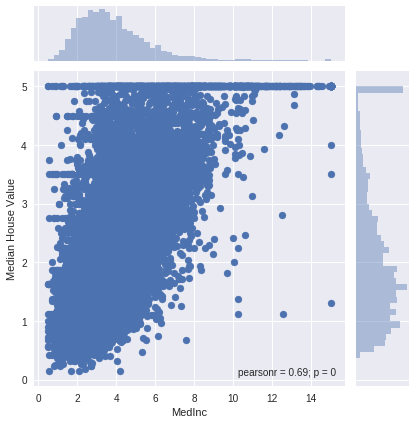

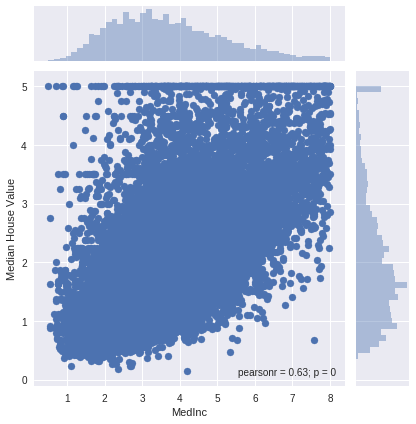

In [57]:
sns.jointplot(x="MedInc", y="Median House Value", data=CA_Housing_Full_df)
sns.jointplot(x="MedInc", y="Median House Value", data=CA_Housing_df_out_rev)

**House Age: ** No signifant change

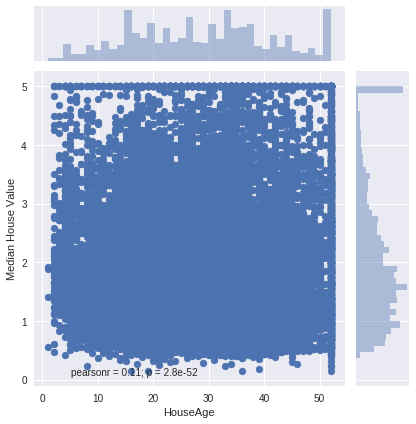

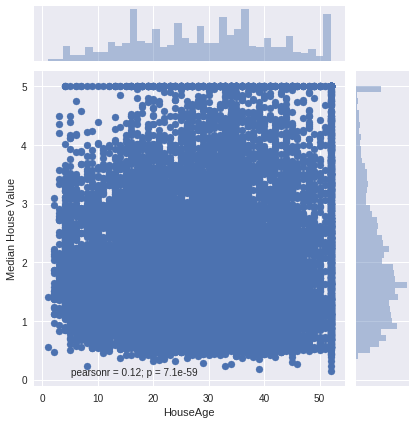

In [58]:
sns.jointplot(x="HouseAge", y="Median House Value", data=CA_Housing_Full_df)
sns.jointplot(x="HouseAge", y="Median House Value", data=CA_Housing_df_out_rev)

**Average Rooms:** Significant enhancement ---> Distribution convereged to Normal 

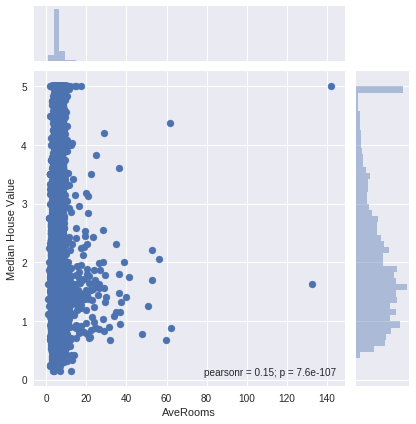

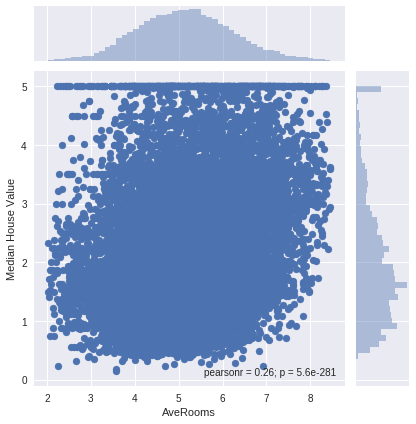

In [60]:
sns.jointplot(x="AveRooms", y="Median House Value", data=CA_Housing_Full_df)
sns.jointplot(x="AveRooms", y="Median House Value", data=CA_Housing_df_out_rev)

**Population: ** No significant change

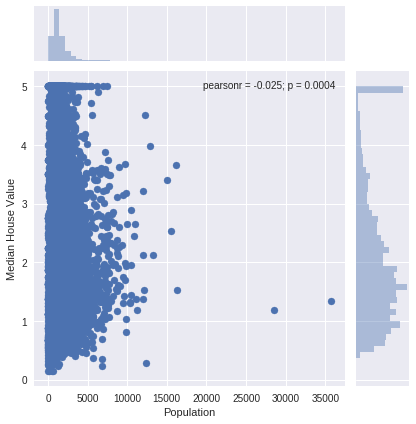

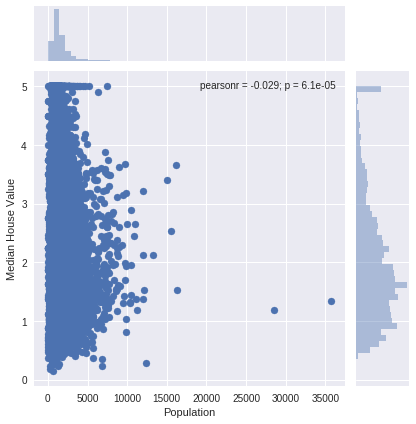

In [61]:
sns.jointplot(x="Population", y="Median House Value", data=CA_Housing_Full_df)
sns.jointplot(x="Population", y="Median House Value", data=CA_Housing_df_out_rev)

**Latitude & Longtitude **: No significant change

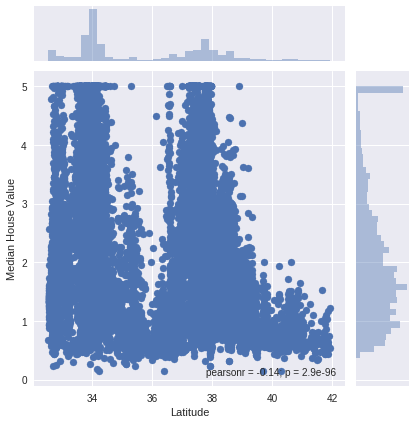

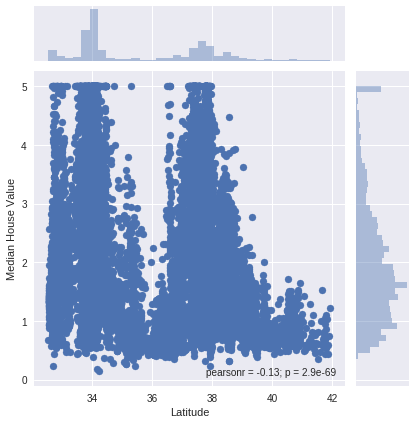

In [62]:
sns.jointplot(x="Latitude", y="Median House Value", data=CA_Housing_Full_df)
sns.jointplot(x="Latitude", y="Median House Value", data=CA_Housing_df_out_rev)

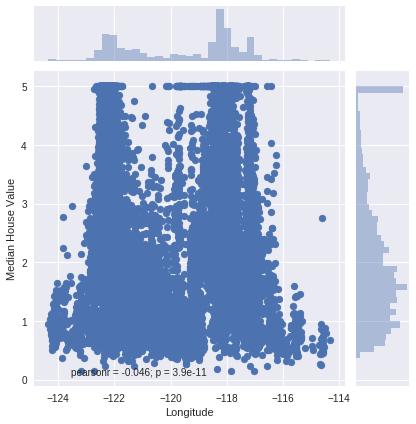

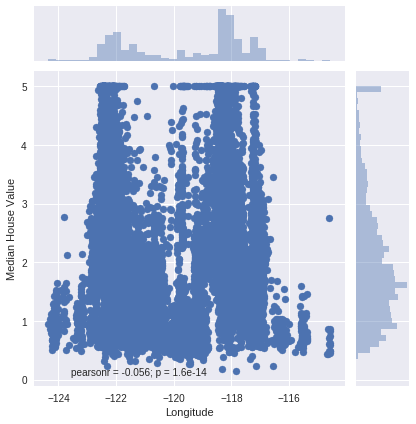

In [63]:
sns.jointplot(x="Longitude", y="Median House Value", data=CA_Housing_Full_df)
sns.jointplot(x="Longitude", y="Median House Value", data=CA_Housing_df_out_rev)

**Visualization** - Relationship between each feature and the Median House Value

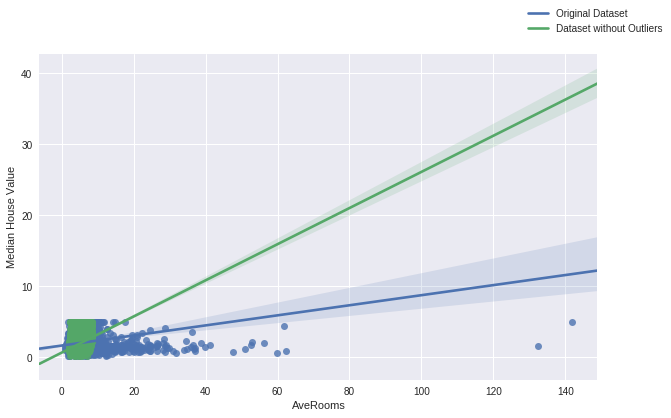

In [64]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(10,6))
sns.regplot(x='AveRooms', y='Median House Value', data=CA_Housing_Full_df)
sns.regplot(x='AveRooms', y='Median House Value', data=CA_Housing_df_out_rev)
fig.legend(labels=['Original Dataset','Dataset without Outliers'])
plt.show()

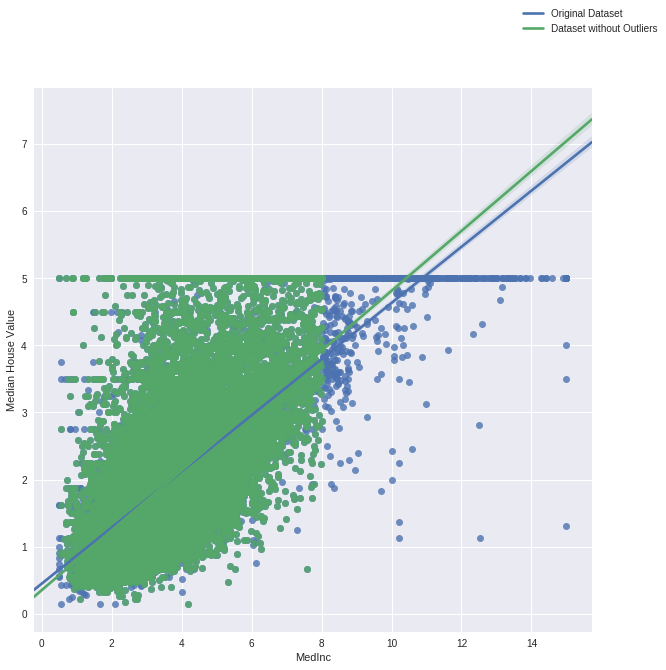

In [65]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(10,10))
sns.regplot(x='MedInc', y='Median House Value', data=CA_Housing_Full_df)
sns.regplot(x='MedInc', y='Median House Value', data=CA_Housing_df_out_rev)
fig.legend(labels=['Original Dataset','Dataset without Outliers'])
plt.show()

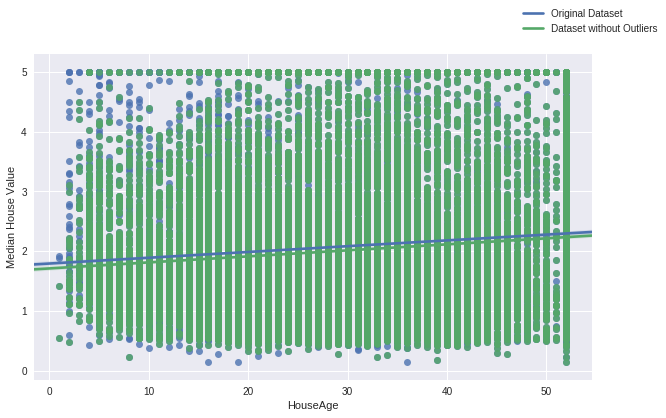

In [66]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(10,6))
sns.regplot(x='HouseAge', y='Median House Value', data=CA_Housing_Full_df)
sns.regplot(x='HouseAge', y='Median House Value', data=CA_Housing_df_out_rev)
fig.legend(labels=['Original Dataset','Dataset without Outliers'])
plt.show()

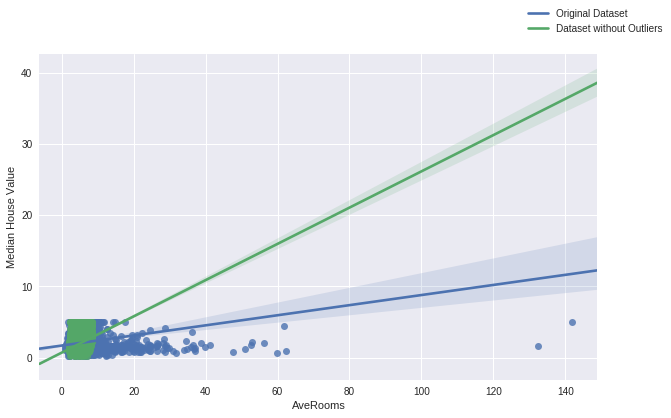

In [67]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(10,6))
sns.regplot(x='AveRooms', y='Median House Value', data=CA_Housing_Full_df)
sns.regplot(x='AveRooms', y='Median House Value', data=CA_Housing_df_out_rev)
fig.legend(labels=['Original Dataset','Dataset without Outliers'])
plt.show()


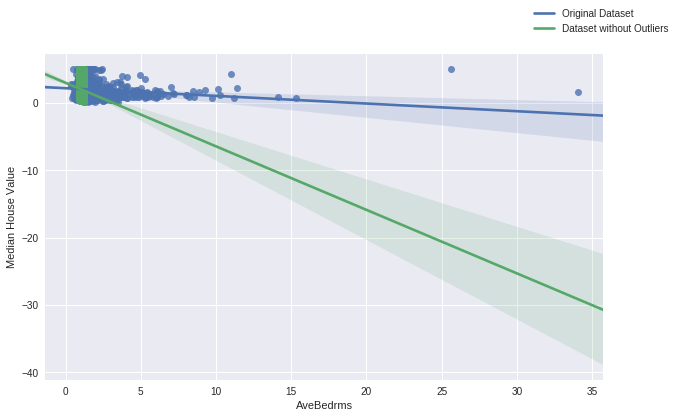

In [68]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(10,6))
sns.regplot(x='AveBedrms', y='Median House Value', data=CA_Housing_Full_df)
sns.regplot(x='AveBedrms', y='Median House Value', data=CA_Housing_df_out_rev)
fig.legend(labels=['Original Dataset','Dataset without Outliers'])
plt.show()


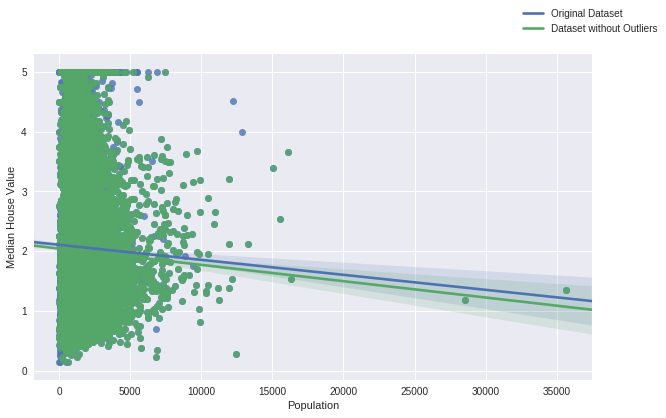

In [69]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(10,6))
sns.regplot(x='Population', y='Median House Value', data=CA_Housing_Full_df)
sns.regplot(x='Population', y='Median House Value', data=CA_Housing_df_out_rev)
fig.legend(labels=['Original Dataset','Dataset without Outliers'])
plt.show()

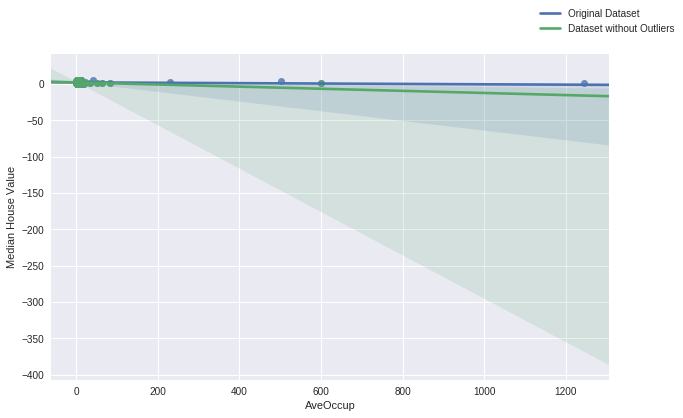

In [70]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(10,6))
sns.regplot(x='AveOccup', y='Median House Value', data=CA_Housing_Full_df)
sns.regplot(x='AveOccup', y='Median House Value', data=CA_Housing_df_out_rev)
fig.legend(labels=['Original Dataset','Dataset without Outliers'])
plt.show()

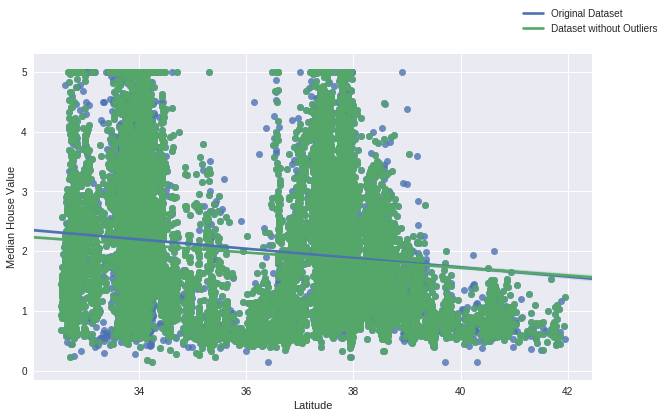

In [71]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(10,6))
sns.regplot(x='Latitude', y='Median House Value', data=CA_Housing_Full_df)
sns.regplot(x='Latitude', y='Median House Value', data=CA_Housing_df_out_rev)
fig.legend(labels=['Original Dataset','Dataset without Outliers'])
plt.show()

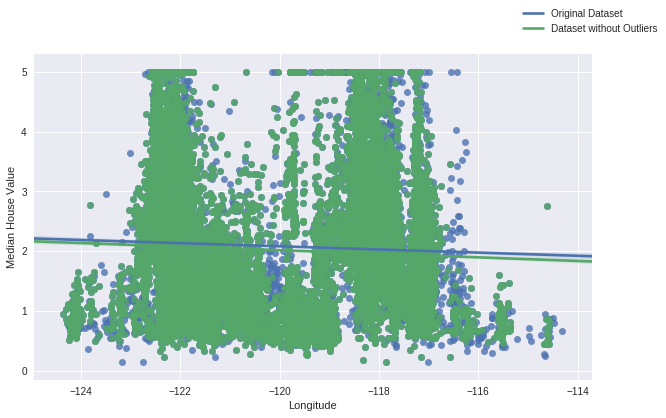

In [72]:
import seaborn as sns; sns.set(color_codes=True)
fig = plt.figure(figsize=(10,6))
sns.regplot(x='Longitude', y='Median House Value', data=CA_Housing_Full_df)
sns.regplot(x='Longitude', y='Median House Value', data=CA_Housing_df_out_rev)
fig.legend(labels=['Original Dataset','Dataset without Outliers'])
plt.show()

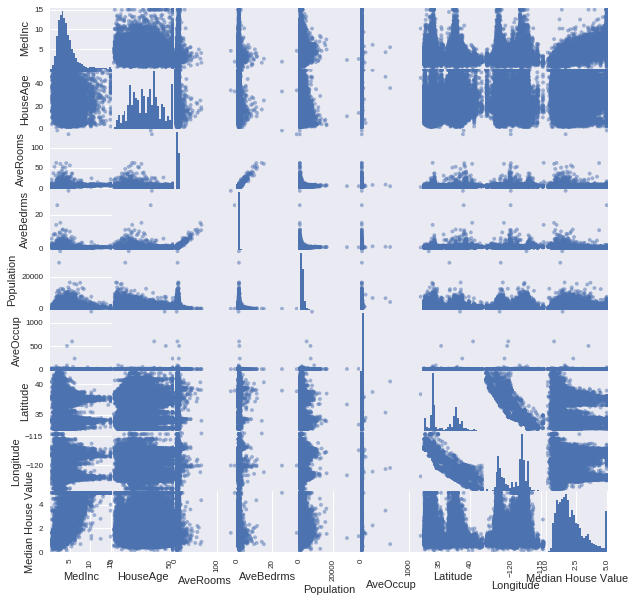

In [73]:
pd.plotting.scatter_matrix(CA_Housing_Full_df, figsize=(10,10), hist_kwds={'bins':30}, s=60, alpha=.5, cmap=mglearn.cm3)
plt.show()

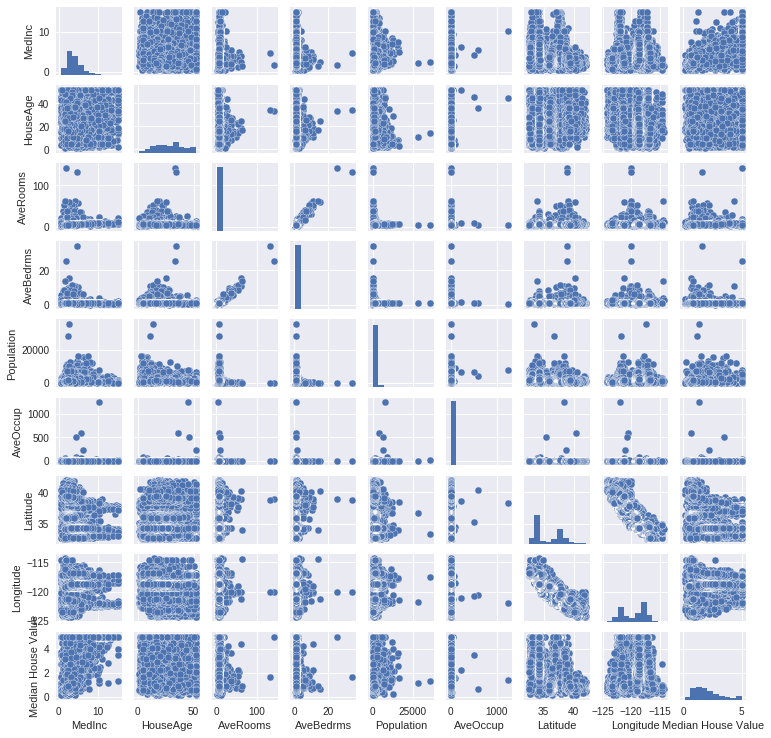

In [0]:
g=sns.pairplot(CA_Housing_Full_df)
g.fig.set_size_inches(10,10)

**Correlation matrix** - *Heat Map*
https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd


**Heat map** indicates no major change, only stronger relationship for already correlated features.
Transformation will occur during assessment of different models


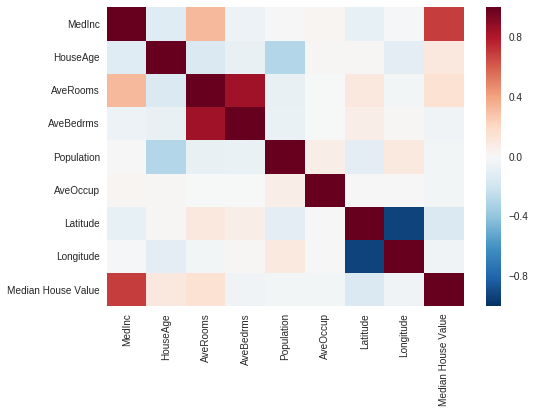

In [74]:
# Calculate and plot
corr_matrix = CA_Housing_Full_df.corr()
sns.heatmap(corr_matrix)

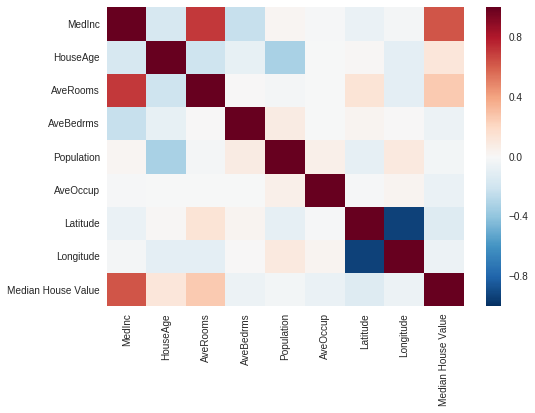

In [75]:
corr_matrix = CA_Housing_df_out_rev.corr()
sns.heatmap(corr_matrix)

Plotting the Least Squares Line

In [0]:
#sns.pairplot(CA_Housing_df_out_rev, x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], y_vars='Median House Value', size=7, aspect=0.7, kind='reg')

**Conclusion : **
Heat map indicates :

*   Strong positive correlation between Median Income and Median House Value
*   Strong negative correlation between Latitude and Longtitude
*   Expected Strong correlation between Average Number of Rooms & Average Number of Bedrooms
*   Heat map for Dataset without Outliers confiems earlier conclusion in addition to Median Income and Average   no of rooms wich is expected




**Other Sources & Links**


*   Gradiant Boosted Regression Trees
https://shankarmsy.github.io/stories/gbrt-sklearn.html

*   Logistic Regression https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/



In [77]:
!pip install -q sklearn.cross_validation

  Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: )
No matching distribution found for sklearn.cross_validation


Three benefits of performing feature selection before modeling your data are:

*   Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
*   Improves Accuracy: Less misleading data means modeling accuracy improves.
*   Reduces Training Time: Less data means that algorithms train faster.

https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [98]:
from sklearn.linear_model import LinearRegression
LinearModel = LinearRegression().fit(X_train, y_train)
print("LinearModel.coef:{}".format(LinearModel.coef_))
print("LinearModel.intercept:{}".format(LinearModel.intercept_))

LinearModel.coef:[ 4.39091042e-01  9.59864665e-03 -1.03311173e-01  6.16730152e-01
 -7.63275197e-06 -4.48838256e-03 -4.17353284e-01 -4.30614462e-01]
LinearModel.intercept:-36.60959377871435


In [99]:
print("Training set score:{:.2f}".format(LinearModel.score(X_train, y_train)))
print("Testing set score:{:.2f}".format(LinearModel.score(X_test, y_test)))

Training set score:0.61
Testing set score:0.59


Sources & Links https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

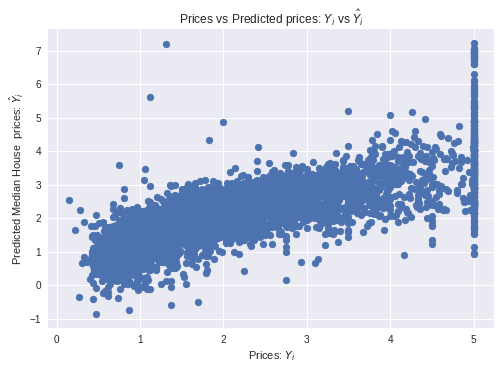

In [100]:
Y_pred = LinearModel.predict(X_test)
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted Median House  prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")



In [101]:
mse = sklearn.metrics.mean_squared_error(y_test, Y_pred)
print(mse)

0.5404128061709091


**Applying Data Transformation**


*   Min Max Scaler
*   MaxAbsScaler
*   StandardScaler
*   RobustScaler
*   Normalizer
*   QuantileTransformer
*  PowerTransformer


https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py




In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.preprocessing import PowerTransformer

**Transformation:  Original Dataset - Training**

*Using Chaining as Most efficient Process*

**Summarize Model Results Using different Training Sets:**

*   Original :  X,y
*  After excluding Outliers: X1,y1
*  Transformed :
1.   X1_train_StandardScaler
2.   X1_train_MinMaxScaler
3.   X1_train_MaxAbsScaler
4.   X1_train_RobustScaler
5.   X1_train_QuantileTransformer
6.   X1_train_uniform
7.   X1_train_Normalizer

Sourcee & Links : https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

https://www.programcreek.com/python/example/81623/sklearn.metrics.classification_report


**Scalling Data**
*Original Dataset*


In [0]:
X_train_StandardScaler = StandardScaler().fit_transform(X_train)
X_train_MinMaxScaler = MinMaxScaler().fit_transform(X_train)
X_train_MaxAbsScaler = MaxAbsScaler().fit_transform(X_train)
X_train_RobustScaler = RobustScaler(quantile_range=(25, 75)).fit_transform(X_train)
#X_train_yeo-johnson = PowerTransformer(method='yeo-johnson').fit_transform(X_train)
#X_train_BoxCox = PowerTransformer(method='box-cox').fit_transform(X_train)
X_train_QuantileTransformer = QuantileTransformer(output_distribution='normal').fit_transform(X_train)
X_train_uniform = QuantileTransformer(output_distribution='uniform').fit_transform(X_train)
X_train_Normalizer= Normalizer().fit_transform(X_train)


In [0]:
X_test_StandardScaler = StandardScaler().fit_transform(X_test)
X_test_MinMaxScaler = MinMaxScaler().fit_transform(X_test)
X_test_MaxAbsScaler = MaxAbsScaler().fit_transform(X_test)
X_test_RobustScaler = RobustScaler(quantile_range=(25, 75)).fit_transform(X_test)
#X_test_yeo-johnson = PowerTransformer(method='yeo-johnson').fit_transform(X_test)
#X_test_BoxCox = PowerTransformer(method='box-cox').fit_transform(X_test)
X_test_QuantileTransformer = QuantileTransformer(output_distribution='normal').fit_transform(X_test)
X_test_uniform = QuantileTransformer(output_distribution='uniform').fit_transform(X_test)
X_test_Normalizer= Normalizer().fit_transform(X_test)

**Transformation:  Dataset without Outliers - Training**

*Using Chaining as Most efficient Process*

Transformed Data will be evaluated in all Models and compared against Original Data with extracted Outliers

In [0]:
X1_train_StandardScaler = StandardScaler().fit_transform(X1_train)
X1_train_MinMaxScaler = MinMaxScaler().fit_transform(X1_train)
X1_train_MaxAbsScaler = MaxAbsScaler().fit_transform(X1_train)
X1_train_RobustScaler = RobustScaler(quantile_range=(25, 75)).fit_transform(X1_train)
#X1_train_yeo-johnson = PowerTransformer(method='yeo-johnson').fit_transform(X_train)
#X1_train_BoxCox = PowerTransformer(method='box-cox').fit_transform(X_train)
X1_train_QuantileTransformer = QuantileTransformer(output_distribution='normal').fit_transform(X1_train)
X1_train_uniform = QuantileTransformer(output_distribution='uniform').fit_transform(X1_train)
X1_train_Normalizer= Normalizer().fit_transform(X1_train)

In [0]:
X1_test_StandardScaler = StandardScaler().fit_transform(X1_test)
X1_test_MinMaxScaler = MinMaxScaler().fit_transform(X1_test)
X1_test_MaxAbsScaler = MaxAbsScaler().fit_transform(X1_test)
X1_test_RobustScaler = RobustScaler(quantile_range=(25, 75)).fit_transform(X1_test)
#X_test_yeo-johnson = PowerTransformer(method='yeo-johnson').fit_transform(X_test)
#X_test_BoxCox = PowerTransformer(method='box-cox').fit_transform(X_test)
X1_test_QuantileTransformer = QuantileTransformer(output_distribution='normal').fit_transform(X1_test)
X1_test_uniform = QuantileTransformer(output_distribution='uniform').fit_transform(X1_test)
X1_test_Normalizer= Normalizer().fit_transform(X1_test)



**Scalling Data ** - *Full Dataset*

In [0]:
scaler = StandardScaler()
X_scaled_o = scaler.fit(X_train).transform(X_train)
X_scaled_ot = scaler.fit_transform(X_train)
X_scaled_o = scaler.fit(X_train).transform(X_train)


**Scalling Data - Full Dataset excluding Outliers for 2 Paremeters**

In [111]:
scaler = StandardScaler()
X_scaled_f = scaler.fit(X1_train).transform(X1_train)
X_scaled_ft = scaler.fit_transform(X1_train)
X_scaled_ft

array([[-0.19696251, -0.88787786,  0.34947475, ..., -0.13199844,
         0.98423461, -0.71215781],
       [ 1.37929667,  1.04532031,  1.05507733, ..., -0.0454192 ,
         0.94642246, -1.42116232],
       [ 1.01975627, -0.64622809,  0.29087807, ..., -0.12931631,
         1.07876499, -1.26528189],
       ...,
       [-0.59023306, -0.40457832, -0.57235085, ..., -0.24219401,
        -0.87801381,  0.88687363],
       [-1.10253926,  0.88422046, -0.47684251, ...,  0.20571071,
        -0.81656906,  1.01761205],
       [-1.32317093, -1.6933771 , -0.36641443, ...,  0.17642385,
         0.08619603,  0.16781232]])

**Evaluation of Linear Regression Model **

Unable to reproduce Results which includes p values by each feature w/ wo outliers:(

In [0]:
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

**Using Dataset after Outliers were excluded**

In [126]:
from sklearn.linear_model import LinearRegression
LinearModel1 = LinearRegression().fit(X1_train, y1_train)
print("LinearModel.coef:{}".format(LinearModel1.coef_))
print("LinearModel.intercept:{}".format(LinearModel1.intercept_))
print("Training set score:{:.2f}".format(LinearModel1.score(X1_train, y1_train)))
print("Testing set score:{:.2f}".format(LinearModel1.score(X1_test, y1_test)))
y1_pred_lr = LinearModel1.predict(X1_test)
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_lr ))
print("Training Root Mean Squared Error: {}".format(rmse))


LinearModel.coef:[ 5.60735349e-01  1.21609505e-02 -2.32578767e-01  2.57237028e+00
 -1.03752672e-05 -7.73201922e-03 -3.70730726e-01 -3.93836330e-01]
LinearModel.intercept:-35.777533146132654
Training set score:0.58
Testing set score:0.58
Training Root Mean Squared Error: 0.6818617005285206


**Ridge Regression**

In [0]:
from sklearn.linear_model import Ridge
Ridge_Model = Ridge().fit(X_train, y_train)


In [125]:
print("Training set score:{:.2f}".format(Ridge_Model.score(X_train, y_train)))
print("Testing set score:{:.2f}".format(Ridge_Model.score(X_test, y_test)))
y_pred_r = Ridge_Model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_r ))
print("Training Root Mean Squared Error: {}".format(rmse))



Training set score:0.61
Testing set score:0.59
Training Root Mean Squared Error: 0.7351348962143709


In [0]:
from sklearn.linear_model import Ridge
Ridge_Model_rev = Ridge().fit(X1_train, y1_train)

In [128]:
print("Training set score:{:.2f}".format(Ridge_Model_rev.score(X1_train, y1_train)))
print("Testing set score:{:.2f}".format(Ridge_Model_rev.score(X1_test, y1_test)))
y_pred_r_rev = Ridge_Model_rev.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_r_rev ))
print("Training Root Mean Squared Error: {}".format(rmse))


Training set score:0.58
Testing set score:0.58
Training Root Mean Squared Error: 0.9177296447079786


Compare additional Ridge Models using diff. Alpha values

In [129]:
Ridge_Model_01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score_R01:{:.2f}".format(Ridge_Model_01.score(X_train, y_train)))
print("Testing set score_R01:{:.2f}".format(Ridge_Model_01.score(X_test, y_test)))


Ridge_Model_10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score_R01:{:.2f}".format(Ridge_Model_10.score(X_train, y_train)))
print("Testing set score_R01:{:.2f}".format(Ridge_Model_10.score(X_test, y_test)))


Training set score_R01:0.61
Testing set score_R01:0.59
Training set score_R01:0.61
Testing set score_R01:0.59


**Prediction & MSE - Ridge **

In [132]:
from sklearn.model_selection import GridSearchCV
# steps
steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'ridge__alpha':np.logspace(-4, 0, 50)}

# Create the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=7)

# Fit to the training set
cv.fit(X1_train, y1_train)

#predict on train set
y_pred_train=cv.predict(X1_train)

# Predict test set
y_pred_test=cv.predict(X1_test)

# rmse on train set
rmse = np.sqrt(mean_squared_error(y1_train, y_pred_train))
print("Training Root Mean Squared Error: {}".format(rmse))






Training Root Mean Squared Error: 0.6842331369404853


In [0]:
print(param_grid)

In [0]:
grid = GridSearchCV(Ridge(), param_grid, cv=7)
grid.fit(X_train, y_train)

Text(0.5,1,'Ridge Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

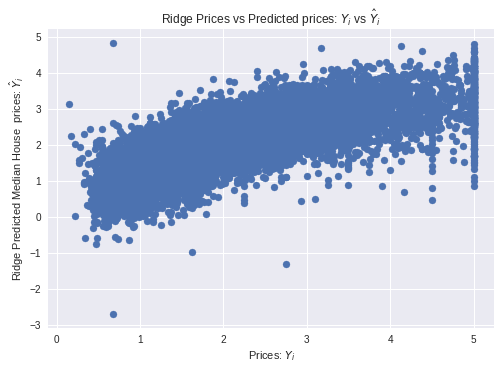

In [135]:
plt.scatter(y1_train, y_pred_train)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Ridge Predicted Median House  prices: $\hat{Y}_i$")
plt.title("Ridge Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Test Root Mean Squared Error: 0.6818631287534869


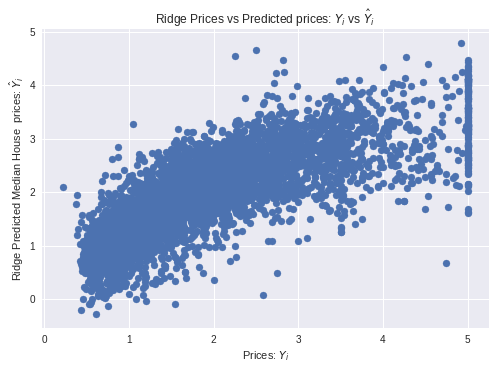

In [136]:
plt.scatter(y1_test, y_pred_test)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Ridge Predicted Median House  prices: $\hat{Y}_i$")
plt.title("Ridge Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
rmse = np.sqrt(mean_squared_error(y1_test, y_pred_test))

print("Test Root Mean Squared Error: {}".format(rmse))


**Plotting results for comparison**

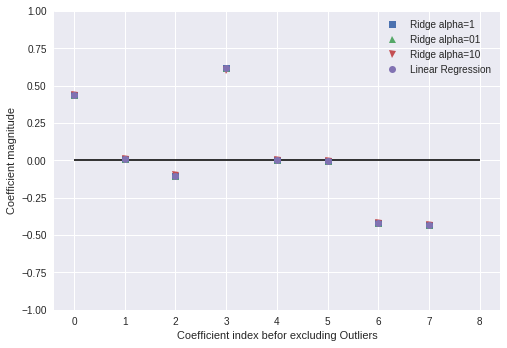

In [137]:
plt.plot(Ridge_Model.coef_, 's', label = "Ridge alpha=1")
plt.plot(Ridge_Model_01.coef_, '^', label = "Ridge alpha=01")
plt.plot(Ridge_Model_10.coef_, 'v', label = "Ridge alpha=10")
plt.plot(LinearModel.coef_, 'o', label = "Linear Regression")

plt.xlabel("Coefficient index befor excluding Outliers")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(LinearModel.coef_))
plt.ylim(-1,1)
plt.legend()


https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py

**Using Dataset after excluding Outliers**

In [0]:
from sklearn.linear_model import Ridge
Ridge_Model_wo = Ridge().fit(X1_train, y1_train)
print("Training set score:{:.2f}".format(Ridge_Model_wo.score(X1_train, y1_train)))
print("Testing set score:{:.2f}".format(Ridge_Model_wo.score(X1_test, y1_test)))

Ridge_Model_wo_01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score_R01:{:.2f}".format(Ridge_Model_wo_01.score(X1_train, y1_train)))
print("Testing set score_R01:{:.2f}".format(Ridge_Model_wo_01.score(X1_test, y1_test)))

Ridge_Model_wo_10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set without Outliers score_R01:{:.2f}".format(Ridge_Model_wo_10.score(X1_train, y1_train)))
print("Testing set without Outliers score_R01:{:.2f}".format(Ridge_Model_wo_10.score(X1_test, y1_test)))


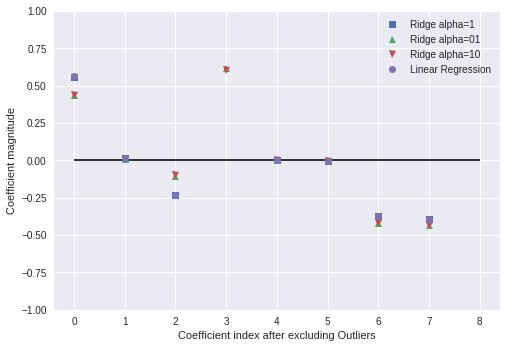

In [140]:
plt.plot(Ridge_Model_wo.coef_, 's', label = "Ridge alpha=1")
plt.plot(Ridge_Model_wo_01.coef_, '^', label = "Ridge alpha=01")
plt.plot(Ridge_Model_wo_10.coef_, 'v', label = "Ridge alpha=10")
plt.plot(LinearModel1.coef_, 'o', label = "Linear Regression")

plt.xlabel("Coefficient index after excluding Outliers")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(LinearModel1.coef_))
plt.ylim(-1,1)
plt.legend()

**Lasso Model**

In [0]:
from sklearn.linear_model import Lasso

In [142]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ !=0)))

Training set score: 0.29
Test set score: 0.28
Number of features used: 3


*Additional lasso models with diff. max tier*

In [143]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:{}".format(np.sum(lasso001.coef_ !=0)))

Training set score: 0.61
Test set score: 0.59
Number of features used:8


In [144]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:{}".format(np.sum(lasso00001.coef_ !=0)))

Training set score: 0.61
Test set score: 0.59
Number of features used:8


Text(0,0.5,'Coefficient magnitude')

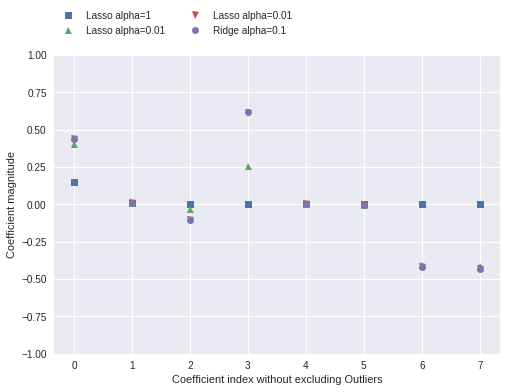

In [145]:
plt.plot(lasso.coef_,'s', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.01")

plt.plot(Ridge_Model.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-1,1)
plt.xlabel("Coefficient index without excluding Outliers")
plt.ylabel("Coefficient magnitude")

Lasso Model with  Dataset excluding Outliers

In [146]:
lasso_rev = Lasso().fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(lasso.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(lasso.score(X1_test, y1_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ !=0)))

Training set score: 0.23
Test set score: 0.23
Number of features used: 3


In [147]:
lasso001_rev = Lasso(alpha=0.01, max_iter=100000).fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(lasso001_rev.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(lasso001_rev.score(X1_test, y1_test)))
print("Number of features used:{}".format(np.sum(lasso001_rev.coef_ !=0)))

Training set score: 0.56
Test set score: 0.56
Number of features used:7


In [148]:
lasso00001_rev = Lasso(alpha=0.0001, max_iter=100000).fit(X1_train, y1_train)
print("Training set score: {:.2f}".format(lasso00001_rev.score(X1_train, y1_train)))
print("Test set score: {:.2f}".format(lasso00001_rev.score(X1_test, y1_test)))
print("Number of features used:{}".format(np.sum(lasso00001_rev.coef_ !=0)))

Training set score: 0.58
Test set score: 0.58
Number of features used:8


Text(0,0.5,'Coefficient magnitude')

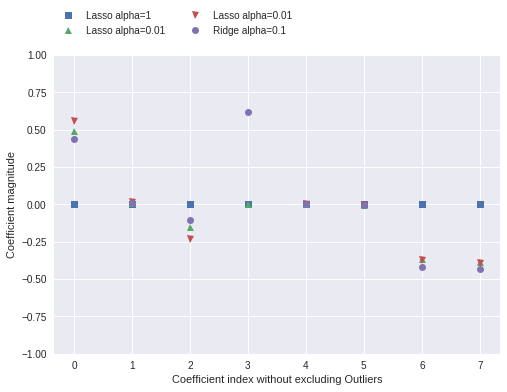

In [149]:
plt.plot(lasso_rev.coef_,'s', label="Lasso alpha=1")
plt.plot(lasso001_rev.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001_rev.coef_, 'v', label="Lasso alpha=0.01")

plt.plot(Ridge_Model_wo_01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-1,1)
plt.xlabel("Coefficient index without excluding Outliers")
plt.ylabel("Coefficient magnitude")

Fine Tuning the Model to explore if any will perform better.

*For example, the original model used only 3 features out of the 8.*

**Example only of comparing learning curve of different models**

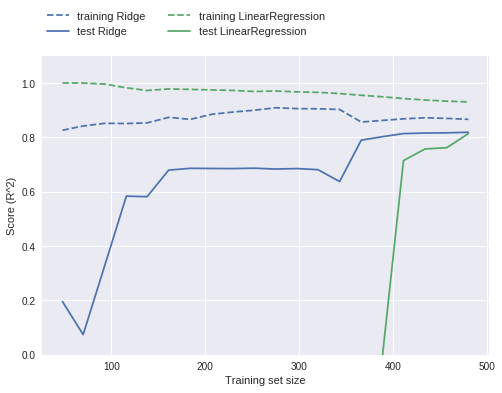

In [150]:
mglearn.plots.plot_ridge_n_samples()

https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

In [151]:
print("Type of data:{}".format(type(X_train)))

Type of data:<class 'numpy.ndarray'>


In [152]:
print(X_train[1])
print(y_train[1])

[   5.9547       18.            6.5473251     1.10288066  547.
    2.25102881   32.95       -117.24      ]
3.293


**Transorming the Target Variable **
https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-auto-examples-compose-plot-transformed-target-py

Sources & Links - ftp://ftp.cea.fr/pub/unati/people/educhesnay/M2_IMSD/StatisticsMachineLearningPythonDraft.pdf

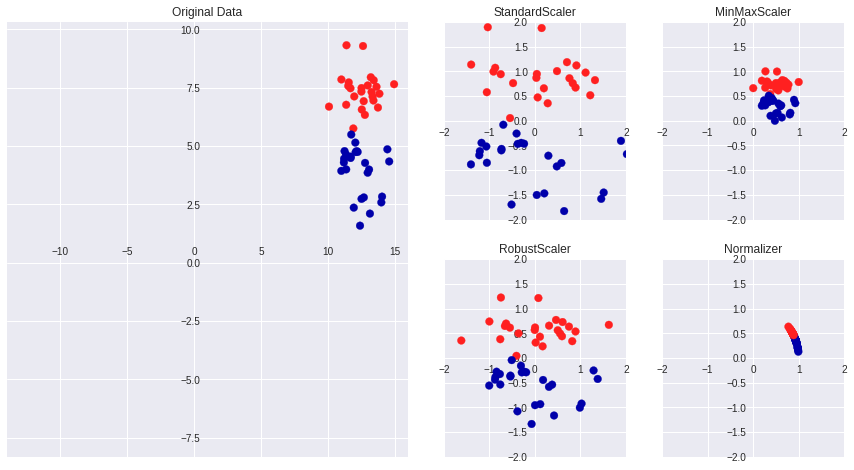

In [153]:
# Different Types of Preprocessing & Scalling
mglearn.plots.plot_scaling()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

In [0]:
#List of Training & Testing 
#Before Excluding Outliers 
# X_train
# y_train
# After Excluding Outliers 
# X1_train
# y1_train **bold text**

Plot Training & Test Sets

## Pending ##

In [0]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm


**Process From Class Presentation**


In [0]:
# KNN can be used for Continuous variables and will be evaluated for complteness at later date
# from sklearn.model_selection import train_test_split
# features = ['MedInc', 'HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
# X = CA_Housing_df_out_rev[features]
# y = CA_Housing_df_out_rev['Median House Value']
# X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X,y)

# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(X_train_rev, y_train_rev)
# print("Accuracy: {:.2f}".foramt(knn.score(X_test_rev, y_test_rev)))



**Ridge Model with Dataset without Outliers**

In [156]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
features = ['MedInc', 'HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
X = CA_Housing_df_out_rev[features]
y = CA_Housing_df_out_rev['Median House Value']
X_train_rev, X_test_rev, y_train_rev, y_test_rev=train_test_split(X,y, random_state=43)

scaler = StandardScaler()
scaler.fit(X_train_rev)
X_train_rev_scaled = scaler.transform(X_train_rev)
ridge = Ridge().fit(X_train_rev_scaled,y_train_rev)
X_test_rev_scaled = scaler.transform(X_test_rev)
print(ridge.score(X_test_rev_scaled, y_test_rev))
print(np.mean(cross_val_score(Ridge(), X_train_rev, y_train_rev, cv=10)))






0.5862602628877854
0.30465796894548747


In [157]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}
print(param_grid)

{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


**Results shows the best Cross Validation Value and associated Alpha**

In [158]:
grid = GridSearchCV(Ridge(normalize=True), param_grid,
                    cv=10, return_train_score=True, scoring='r2')
grid.fit(X, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


Best cross-validation score: 0.20
Best parameters:  {'alpha': 0.01}


In [0]:
alphas = np.logspace(-3, 3, 13)

train_scores_mean = grid.cv_results_["mean_train_score"]
train_scores_std = grid.cv_results_["std_train_score"]
test_scores_mean = grid.cv_results_["mean_test_score"]
test_scores_std = grid.cv_results_["std_test_score"]

Sources & Links :
https://stackoverflow.com/questions/48796282/how-to-visualize-dependence-of-model-performance-alpha-with-matplotlib

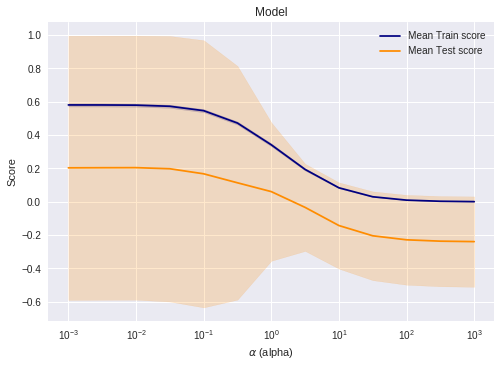

In [160]:
plt.figure()
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()


**Liner Regression Model with Dataset without Outliers**

In [161]:
from sklearn.model_selection import train_test_split
features = ['MedInc', 'HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
X = CA_Housing_df_out_rev[features]
y = CA_Housing_df_out_rev['Median House Value']
X_train_rev, X_test_rev, y_train_rev, y_test_rev=train_test_split(X,y, random_state=42)

print("Linear Regression Score = R^2: ")
print(np.mean(cross_val_score(LinearRegression(), X_train_rev, y_train_rev, cv=10)))


Linear Regression Score = R^2: 
0.5859940708639575


**Linear Regression Model with Dataset Transformed*

In [162]:
from sklearn.linear_model import LinearRegression
LinearModel_t1 = LinearRegression().fit(X1_train_StandardScaler, y1_train)
print("LinearModel.coef:{}".format(LinearModel_t1.coef_))
print("LinearModel.intercept:{}".format(LinearModel_t1.intercept_))

print("Training set score:{:.2f}".format(LinearModel_t1.score(X1_train_StandardScaler, y1_train)))
print("Testing set score:{:.2f}".format(LinearModel_t1.score(X1_test_StandardScaler, y1_test)))


LinearModel.coef:[ 0.82954553  0.15097408 -0.25000399  0.1693965  -0.01211356 -0.04042011
 -0.78436316 -0.78322383]
LinearModel.intercept:2.0076782327927973
Training set score:0.58
Testing set score:0.59


In [163]:
from sklearn.linear_model import LinearRegression
LinearModel_t2 = LinearRegression().fit(X1_train_MinMaxScaler, y1_train)
print("LinearModel.coef:{}".format(LinearModel_t2.coef_))
print("LinearModel.intercept:{}".format(LinearModel_t2.intercept_))

print("Training set score:{:.2f}".format(LinearModel_t2.score(X1_train_MinMaxScaler, y1_train)))
print("Testing set score:{:.2f}".format(LinearModel_t2.score(X1_test_MinMaxScaler, y1_test)))

LinearModel.coef:[ 4.2119075   0.62020848 -1.49319678  0.96080059 -0.37015841 -4.62875869
 -3.48857613 -3.8517193 ]
LinearModel.intercept:3.171548154073599
Training set score:0.58
Testing set score:0.32


In [164]:
from sklearn.linear_model import LinearRegression
LinearModel_t3 = LinearRegression().fit(X1_train_MaxAbsScaler, y1_train)
print("LinearModel.coef:{}".format(LinearModel_t3.coef_))
print("LinearModel.intercept:{}".format(LinearModel_t3.intercept_))

print("Training set score:{:.2f}".format(LinearModel_t3.score(X1_train_MaxAbsScaler, y1_train)))
print("Testing set score:{:.2f}".format(LinearModel_t3.score(X1_test_MaxAbsScaler, y1_test)))


LinearModel.coef:[  4.4922191    0.63236943  -1.9659685    3.18850688  -0.37021029
  -4.63700238 -15.55215396 -48.97354758]
LinearModel.intercept:-35.77753314613272
Training set score:0.58
Testing set score:0.14


https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [165]:
from sklearn.linear_model import LinearRegression
LinearModel_t3 = LinearRegression().fit(X1_train_MaxAbsScaler, y1_train)
print("LinearModel.coef:{}".format(LinearModel_t3.coef_))
print("LinearModel.intercept:{}".format(LinearModel_t3.intercept_))

print("Training set score:{:.2f}".format(LinearModel_t3.score(X1_train_MaxAbsScaler, y1_train)))
print("Testing set score:{:.2f}".format(LinearModel_t3.score(X1_test_MaxAbsScaler, y1_test)))

LinearModel.coef:[  4.4922191    0.63236943  -1.9659685    3.18850688  -0.37021029
  -4.63700238 -15.55215396 -48.97354758]
LinearModel.intercept:-35.77753314613272
Training set score:0.58
Testing set score:0.14


**Computing Cross-Validated Metrics**

In [0]:
# SVM cannot be used in continuous parameter
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# features = ['MedInc', 'HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
# X = CA_Housing_df_out_rev[features]
# y = CA_Housing_df_out_rev['Median House Value']
# X_train_rev, X_test_rev, y_train_rev, y_test_rev=train_test_split(X, y, test_size=0.4, random_state=0)
# clf = svm.SVC(kernel='linear', C=1).fit(X_train_rev, y_train_rev)
# clf.score(X_train_rev, y_test_rev)   
# clf = svm.SVC(kernel='linear', C=1)

**Lasso Model with Dataset after excluding Outliers**

In [166]:
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y, cv=10))  


[-0.08379586 -0.3574265  -0.05946186  0.02379452 -0.1116739  -0.03000627
 -0.66891671 -0.02016762 -0.76184333 -0.30748835]


**ElasticNet Model with Dataset after excluding Outliers**

In [167]:
from sklearn.model_selection import train_test_split
features = ['MedInc', 'HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
X = CA_Housing_df_out_rev[features]
y = CA_Housing_df_out_rev['Median House Value']
X, y = make_regression(n_features=8, random_state=0)
regr = ElasticNetCV(cv=10, random_state=0)
regr.fit(X, y)
ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)
print(regr.alpha_) 
print(regr.intercept_)





0.23071327209896184
-3.9994067647833305


Model Cross Validation

**K-Fold**

**Default KFold**

In [168]:
kf = KFold(n_splits=2)
for train, test in kf.split(X):
  print("%s %s" % (train, test))


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


**Repeated Random Kfold**

In [169]:
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
  print("%s %s" % (train, test))

[ 5  7  8  9 12 13 14 16 19 20 22 25 27 28 31 32 36 37 38 40 42 43 45 46
 48 49 50 51 52 54 56 58 60 68 69 70 73 75 76 78 81 82 83 84 87 88 89 93
 94 95] [ 0  1  2  3  4  6 10 11 15 17 18 21 23 24 26 29 30 33 34 35 39 41 44 47
 53 55 57 59 61 62 63 64 65 66 67 71 72 74 77 79 80 85 86 90 91 92 96 97
 98 99]
[ 0  1  2  3  4  6 10 11 15 17 18 21 23 24 26 29 30 33 34 35 39 41 44 47
 53 55 57 59 61 62 63 64 65 66 67 71 72 74 77 79 80 85 86 90 91 92 96 97
 98 99] [ 5  7  8  9 12 13 14 16 19 20 22 25 27 28 31 32 36 37 38 40 42 43 45 46
 48 49 50 51 52 54 56 58 60 68 69 70 73 75 76 78 81 82 83 84 87 88 89 93
 94 95]
[ 3  4  5  6  7 10 12 13 14 17 18 20 23 26 27 30 31 34 35 38 39 40 43 44
 45 46 48 50 54 57 60 61 63 64 67 69 70 74 75 77 78 80 82 83 86 88 90 94
 96 97] [ 0  1  2  8  9 11 15 16 19 21 22 24 25 28 29 32 33 36 37 41 42 47 49 51
 52 53 55 56 58 59 62 65 66 68 71 72 73 76 79 81 84 85 87 89 91 92 93 95
 98 99]
[ 0  1  2  8  9 11 15 16 19 21 22 24 25 28 29 32 33 36 37 41 42 47 49 51
 52

**KFold  -  Leave One Out** *(LOO) *

In [170]:
loo = LeaveOneOut()
for train, test in loo.split(X):  
  print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26

In [171]:
X = np.ones(4)
lpo = LeavePOut(p=2)
for train, test in lpo.split(X):
  print("%s %s" % (train, test))

[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]


**Random permutations cross-validation a.k.a. Shuffle & Split**

In [172]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
  print("%s %s" % (train_index, test_index))

[3 1 0] [2]
[2 1 3] [0]
[0 2 1] [3]
[0 2 3] [1]
[2 3 0] [1]


**Tuning the hyper-parameters of an estimator**

In [0]:
from sklearn.datasets.samples_generator import make_blobs

In [174]:
# Check
sklearn.datasets.make_multilabel_classification


<function sklearn.datasets.samples_generator.make_multilabel_classification>

https://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html#sphx-glr-auto-examples-ensemble-plot-partial-dependence-py

Automatically created module for IPython interactive environment
Training GBRT...
 done.
Convenience plot with ``partial_dependence_plots``
Custom 3d plot via ``partial_dependence``


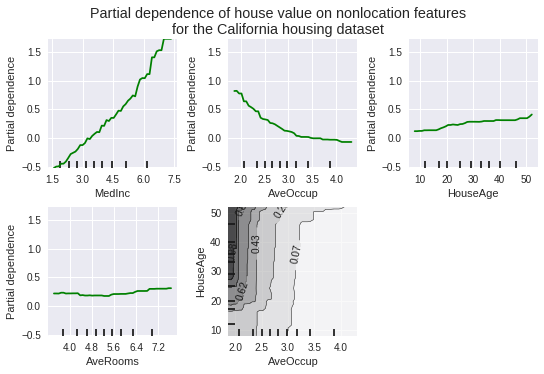

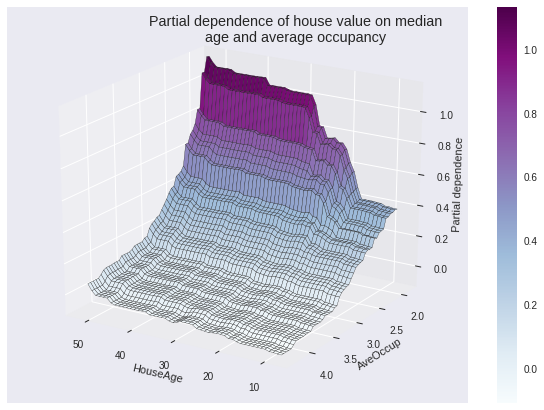

In [175]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing


def main():
    cal_housing = fetch_california_housing()

    # split 80/20 train-test
    X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                        cal_housing.target,
                                                        test_size=0.2,
                                                        random_state=1)
    names = cal_housing.feature_names

    print("Training GBRT...")
    clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
    clf.fit(X_train, y_train)
    print(" done.")

    print('Convenience plot with ``partial_dependence_plots``')

    features = [0, 5, 1, 2, (5, 1)]
    fig, axs = plot_partial_dependence(clf, X_train, features,
                                       feature_names=names,
                                       n_jobs=3, grid_resolution=50)
    fig.suptitle('Partial dependence of house value on nonlocation features\n'
                 'for the California housing dataset')
    plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

    print('Custom 3d plot via ``partial_dependence``')
    fig = plt.figure()

    target_feature = (1, 5)
    pdp, axes = partial_dependence(clf, target_feature,
                                   X=X_train, grid_resolution=50)
    XX, YY = np.meshgrid(axes[0], axes[1])
    Z = pdp[0].reshape(list(map(np.size, axes))).T
    ax = Axes3D(fig)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
    ax.set_xlabel(names[target_feature[0]])
    ax.set_ylabel(names[target_feature[1]])
    ax.set_zlabel('Partial dependence')
    #  pretty init view
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.suptitle('Partial dependence of house value on median\n'
                 'age and average occupancy')
    plt.subplots_adjust(top=0.9)

    plt.show()


# Needed on Windows because plot_partial_dependence uses multiprocessing
if __name__ == '__main__':
    main()

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [176]:
from __future__ import print_function

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[:, [0, 5]]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

Automatically created module for IPython interactive environment


In [0]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

**Original data**

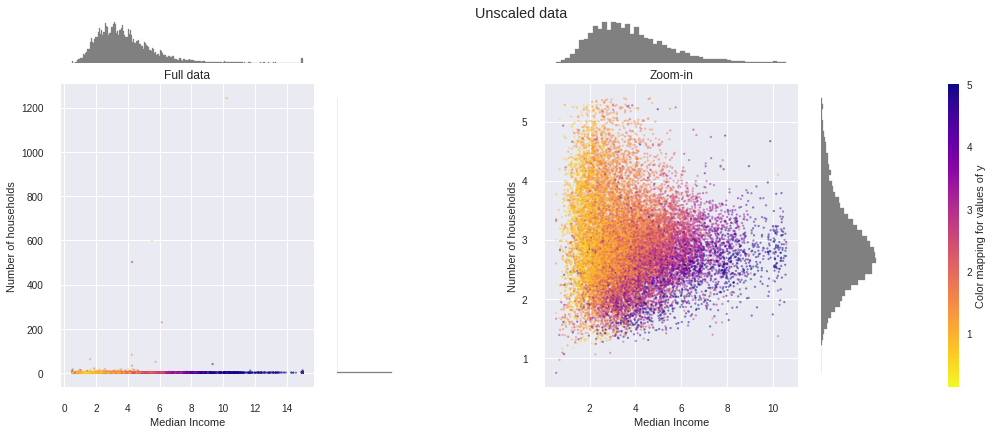

In [178]:
make_plot(0)

**StandardScaler**

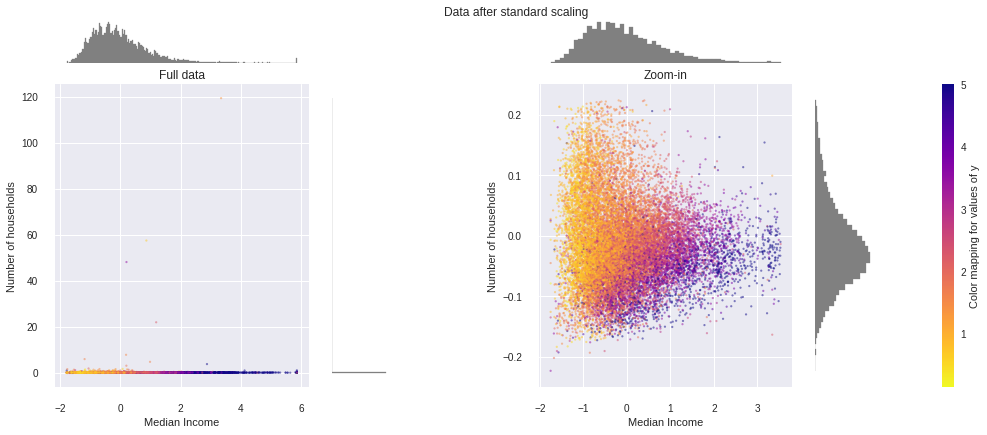

In [0]:
make_plot(1)

**MinMaxScaler**

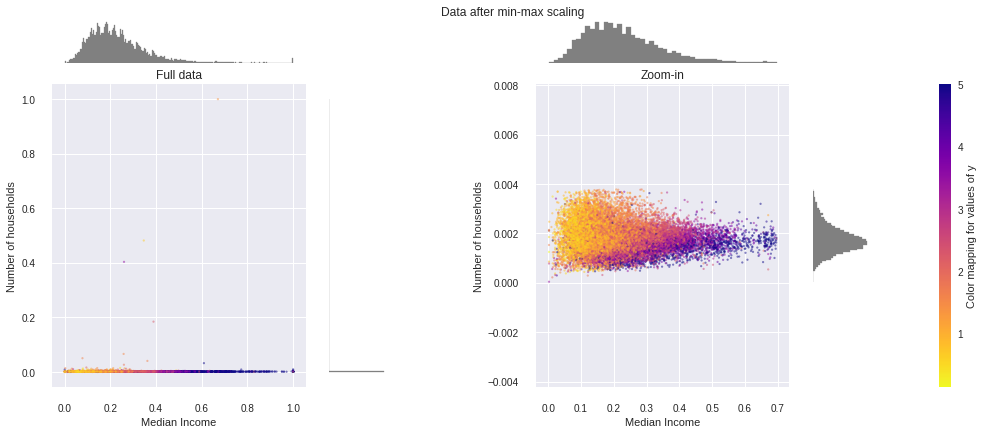

In [0]:
make_plot(2)

**MaxAbsScaler**

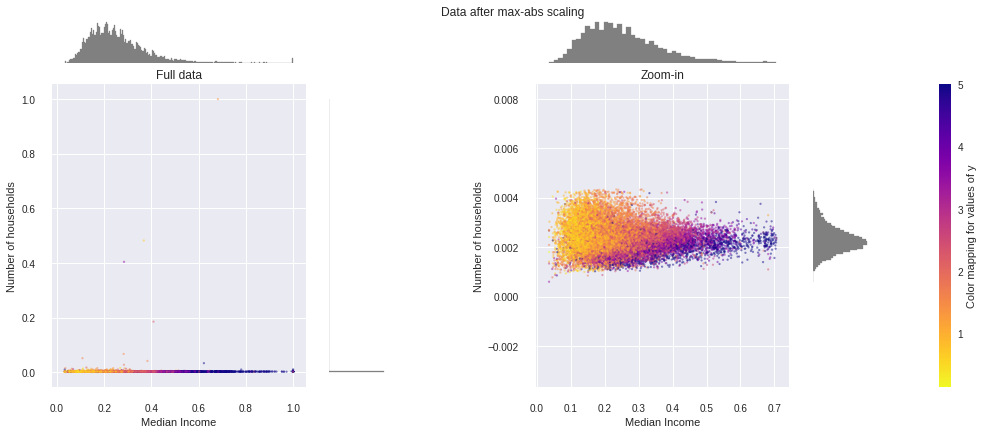

In [0]:
make_plot(3)

**RobustScaler**

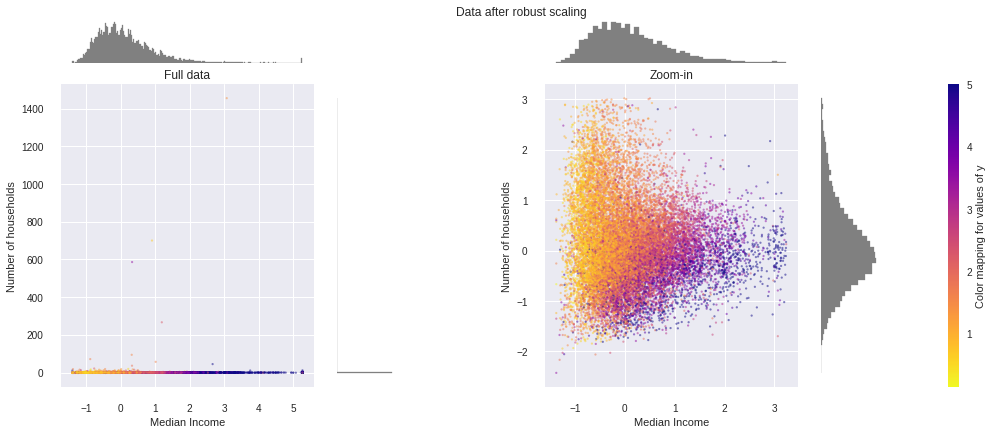

In [0]:
make_plot(4)

**PowerTransformer**

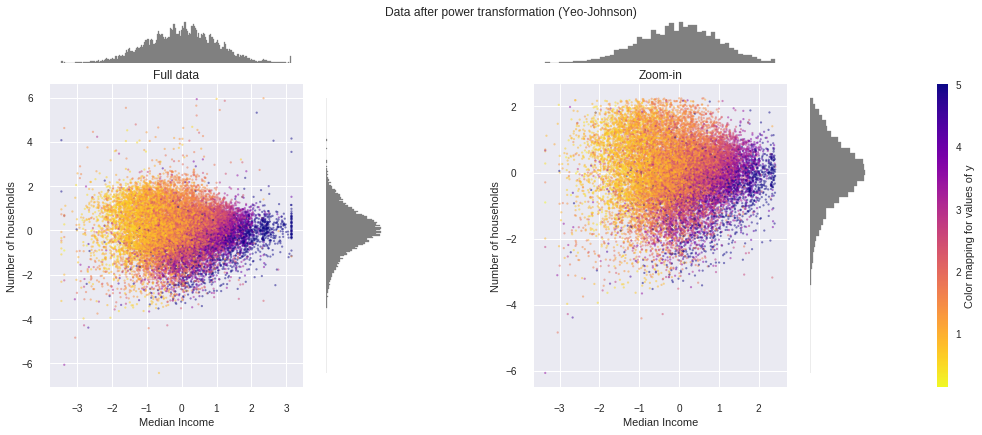

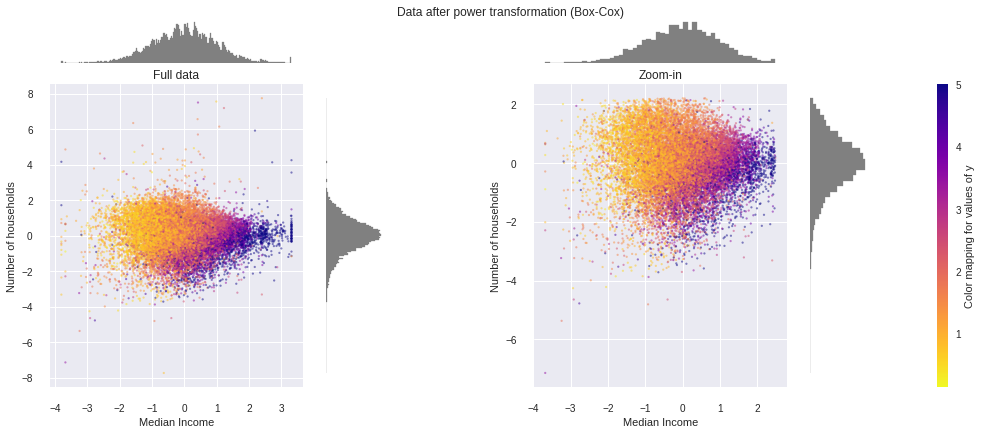

In [0]:
make_plot(5)
make_plot(6)

**QuantileTransformer (Gaussian output)**

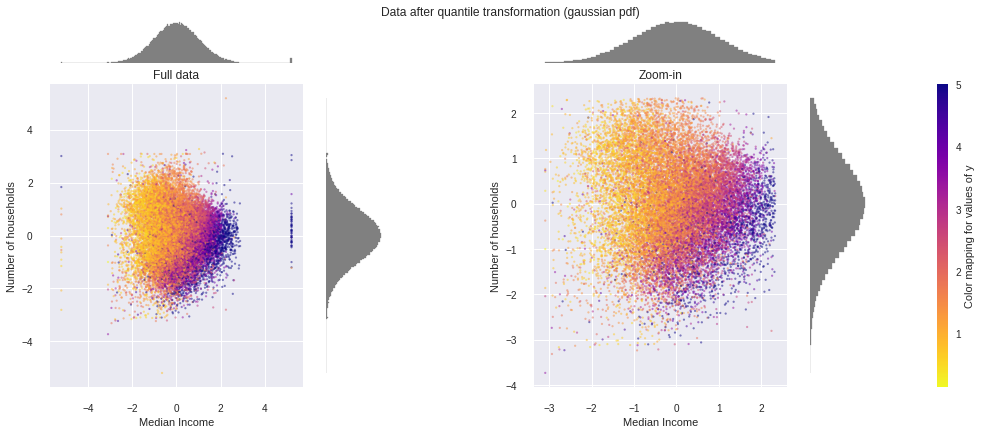

In [0]:
make_plot(7)

**QuantileTransformer (uniform output)**

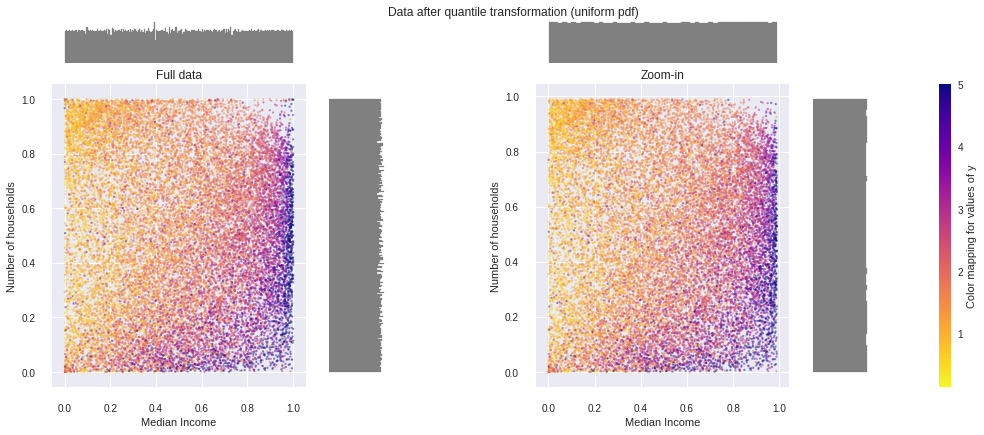

In [0]:
make_plot(8)

**Normalizer**

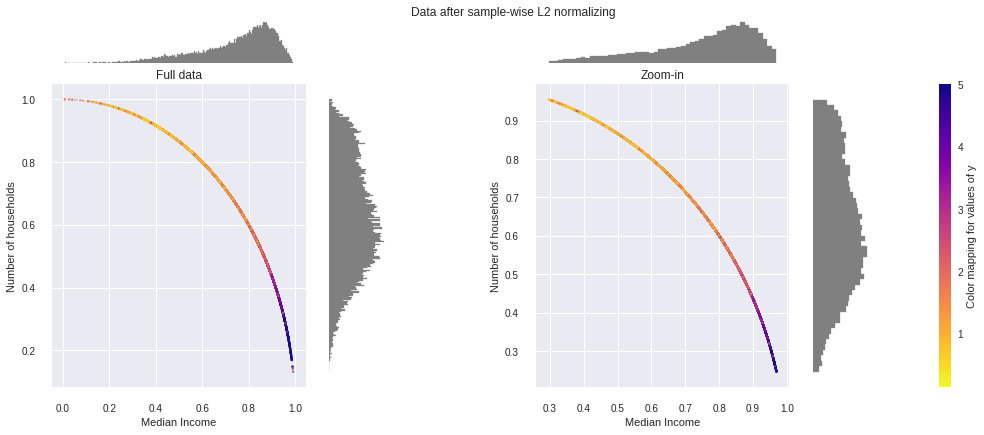

In [0]:
make_plot(9)
plt.show()

https://shankarmsy.github.io/stories/gbrt-sklearn.html
